In [ ]:
#@title Import and install required minicons package
import numpy as np
import pandas as pd
!pip install minicons
!pip install together

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 1.7 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr

In [ ]:
!pip install together

  Using cached together-1.3.5-py3-none-any.whl.metadata (11 kB)
Using cached together-1.3.5-py3-none-any.whl (70 kB)


In [ ]:
#@title Imports

import torch
from minicons import scorer
from pprint import pprint
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#ignore annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@title Dictionary

goaldirectedness_dict={
    'context':'Your roommate just got home after a long day of hard work.',
    'update':'She heads to the kitchen.',
    'interval':["",
                "You have been living together for half a month.",
                "You have been living together for half a month. You both work at the same cafe downstairs.",
                "You have been living together for half a month. You both work at the same cafe downstairs. You have work tomorrow.",
                "You have been living together for half a month. You both work at the same cafe downstairs. You have work tomorrow. You get along quite well.",
                "You have been living together for half a month. You both work at the same cafe downstairs. You have work tomorrow. You get along quite well. She has a cat."
                ],
    "truth_value_query_1":"She is probably hungry",
    "truth_value_answer_1":True,
    "truth_value_query_2":"She is probably not hungry",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, she takes food out of the fridge",
    "continuation_coherent_keyword_1":"to eat.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"to deep clean it.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, she gets",
    "continuation_coherent_keyword_2":"something to eat.",
    "continuation_incoherent_keyword_2":"nothing to eat.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, she gets",
    "continuation_coherent_keyword_3":"some food.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"nothing.",
    "continuation_incoherent_suffix_3":"",
    "tag_social":True,
    "tag_objectness":False,
    "tag_numerosity":False,
    "tag_geometry":False,
    "tag_temporal":False,
    "tag_complexity":2,
    'sentence_id':'goaldirectedness'
    }

efficiency_dict={
    'context':'Your brother needs to run some errands today. He needs to go to the supermarket, laundromat, and office supply store. He has a car. First, he goes to the supermarket.',
    'update':'He needs to bring everything he purchases home.',
    'interval':["",
                "You are both visiting your parents for the summer.",
                "You are both visiting your parents for the summer. He has a Toyota Prius.",
                "You are both visiting your parents for the summer. He has a Toyota Prius. He graduated college four years ago.",
                "You are both visiting your parents for the summer. He has a Toyota Prius. He graduated college four years ago. He works at an investment firm now.",
                "You are both visiting your parents for the summer. He has a Toyota Prius. He graduated college four years ago. He works at an investment firm now. You are still in school, but will graduate in the spring."
                ],
    "truth_value_query_1":"He does not need to go home in between stops",
    "truth_value_answer_1":True,
    "truth_value_query_2":"He needs to go home in between stops",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, he goes",
    "continuation_coherent_keyword_1":"to the laundromat.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"home.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Afterwards, he goes",
    "continuation_coherent_keyword_2":"to the laundromat.",
    "continuation_incoherent_keyword_2":"home in between.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, he goes",
    "continuation_coherent_keyword_3":"to the laundromat.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"home.",
    "continuation_incoherent_suffix_3":"",
    "tag_social":True,
    "tag_objectness":False,
    "tag_numerosity":False,
    "tag_geometry":False,
    "tag_temporal":False,
    "tag_complexity":2,
    'sentence_id':'efficiency'}

reciprocity_dict={
    'context':'You are going on vacation tomorrow, and your dogsitter just canceled on you. You ask your neighbor if he does not mind doing it.',
    'update':'He says, "no, of course not".',
    'interval':["",
                "You have lived in the neighborhood for six months.",
                "You have lived in the neighborhood for six months. Your dogs are both golden retrievers.",
                "You have lived in the neighborhood for six months. Your dogs are both golden retrievers. One is four years old, and the other is five.",
                "You have lived in the neighborhood for six months. Your dogs are both golden retrievers. One is four years old, and the other is five. You've had them since they were both puppies.",
                "You have lived in the neighborhood for six months. Your dogs are both golden retrievers. One is four years old, and the other is five. You've had them since they were both puppies. You are unsure whether your neighbor also has dogs."
                ],
    "truth_value_query_1":"Your neighbor is going to help you",
    "truth_value_answer_1":True,
    "truth_value_query_2":"Your neighbor is not going to help you",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Later, you",
    "continuation_coherent_keyword_1":"mow his lawn to thank him.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"do nothing to thank him.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you offer",
    "continuation_coherent_keyword_2":"to return the favor",
    "continuation_incoherent_keyword_2":"another time.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you say",
    "continuation_coherent_keyword_3":"thank you.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"nothing.",
    "continuation_incoherent_suffix_3":"",
    "tag_social":True,
    "tag_objectness":False,
    "tag_numerosity":False,
    "tag_geometry":False,
    "tag_temporal":False,
    "tag_complexity":3,
    'sentence_id':'reciprocity'}

ToM_dict={
    'context':'You are hiking with your friend. She is several paces ahead of you, and spots a pretty bird in a leafy tree.',
    'update':'She points at it.',
    'interval':["",
                "It is a beautiful day today.",
                "It is a beautiful day today. The sun is shining, and there is a light breeze.",
                "It is a beautiful day today. The sun is shining, and there is a light breeze. You have been hiking together all morning.",
                "It is a beautiful day today. The sun is shining, and there is a light breeze. You have been hiking together all morning. There is a nice trail outside of your friend's home.",
                "It is a beautiful day today. The sun is shining, and there is a light breeze. You have been hiking together all morning. There is a nice trail outside of your friend's home. It is dotted with lakes and clearings."
                ],
    "truth_value_query_1":"You cannot see the bird",
    "truth_value_answer_1":True,
    "truth_value_query_2":"You can see the bird",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next,",
    "continuation_coherent_keyword_1":"you walk to where she is to see the bird.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"she walks to where you are to see the bird.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next,",
    "continuation_coherent_keyword_2":"she tells you to come over to see the bird.",
    "continuation_incoherent_keyword_2":"you tell her to come over to see the bird.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, she explains how to see the bird",
    "continuation_coherent_keyword_3":"from your perspective.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"from her perspective.",
    "continuation_incoherent_suffix_3":"",
    "tag_social":True,
    "tag_objectness":False,
    "tag_numerosity":False,
    "tag_geometry":False,
    "tag_temporal":False,
    "tag_complexity":3,
    'sentence_id':'ToM'
}

above_dict={
    'context':'In the living room there is a shelf.',
    'update':'Books rest there.',
    'interval':["",
                "You have many types of books.",
                "You have many types of books. Your favorite books are fiction, usually related to some sort of historical plot.",
                "You have many types of books. Your favorite books are fiction, usually related to some sort of historical plot. You have had many of the books since you were a kid.",
                "You have many types of books. Your favorite books are fiction, usually related to some sort of historical plot. You have had many of the books since you were a kid. In a way, they are historical for you, too.",
                "You have many types of books. Your favorite books are fiction, usually related to some sort of historical plot. You have had many of the books since you were a kid. In a way, they are historical for you, too. You have always loved having a big collection."
                ],
    "truth_value_query_1":"The books are on top of the shelf",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The books are under the shelf",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you take a book from",
    "continuation_coherent_keyword_1":"the top of the shelf.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"underneath the shelf.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, a book falls from the",
    "continuation_coherent_keyword_2":"top of the shelf.",
    "continuation_incoherent_keyword_2":"bottom of the shelf.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you look back at the books",
    "continuation_coherent_keyword_3":"on top of the shelf.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"below the shelf.",
    "continuation_incoherent_suffix_3":"",
    "tag_social":False,
    "tag_objectness":False,
    "tag_numerosity":False,
    "tag_geometry":True,
    "tag_temporal":False,
    "tag_complexity":1,
    'sentence_id':'above'
}

cutting_dict={
    'context':'Behind the house is the backyard. A hedge surrounds it. There is a fence that cuts through the garden.',
    'update':'You climb the fence.',
    'interval':["",
                "The sun is shining.",
                "The sun is shining. The backyard is filled with lots of flowers.",
                "The sun is shining. The backyard is filled with lots of flowers. It is grassy as well.",
                "The sun is shining. The backyard is filled with lots of flowers. It is grassy as well. The hedge is not too tall.",
                "The sun is shining. The backyard is filled with lots of flowers. It is grassy as well. The hedge is not too tall. The fence is made of wood."
                ],
    "truth_value_query_1":"You are in the garden",
    "truth_value_answer_1":True,
    "truth_value_query_2":"You are not in the garden",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you go for a walk in the",
    "continuation_coherent_keyword_1":"garden.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"neighborhood.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you look at the fence from",
    "continuation_coherent_keyword_2":"inside the garden.",
    "continuation_incoherent_keyword_2":"outside the garden.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you walk around the",
    "continuation_coherent_keyword_3":"garden.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"street.",
    "continuation_incoherent_suffix_3":"",
    "tag_social":False,
    "tag_objectness":False,
    "tag_numerosity":False,
    "tag_geometry":True,
    "tag_temporal":False,
    "tag_complexity":3,
    'sentence_id':'cutting'
}


surrounding_dict={
    'context':'Behind the house is the backyard. A fence surrounds it. You leave the house through the back door.',
    'update':'You climb the fence.',
    'interval':["",
                "The sun is shining.",
                "The sun is shining. The backyard is filled with lots of flowers.",
                "The sun is shining. The backyard is filled with lots of flowers. It is grassy as well.",
                "The sun is shining. The backyard is filled with lots of flowers. It is grassy as well. The fence is made of wood.",
                "The sun is shining. The backyard is filled with lots of flowers. It is grassy as well. The fence is made of wood. It is about 180cm tall."
                ],
    "truth_value_query_1":"You are not in the garden",
    "truth_value_answer_1":True,
    "truth_value_query_2":"You are in the garden",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you go for a walk in the",
    "continuation_coherent_keyword_1":"neighborhood.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"garden.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you look at the fence from",
    "continuation_coherent_keyword_2":"outside the garden.",
    "continuation_incoherent_keyword_2":"inside the garden.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you walk around the",
    "continuation_coherent_keyword_3":"street.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"garden.",
    "continuation_incoherent_suffix_3":"",
    "tag_social":False,
    "tag_objectness":False,
    "tag_numerosity":False,
    "tag_geometry":True,
    "tag_temporal":False,
    "tag_complexity":3,
    'sentence_id':'surrounding'
}

far_dict={ # Can easily make another one of these
    'context':'You are waiting at the railroad crossing. The barriers have been lowered. You see the train coming.',
    'update':'It looks quite small.',
    'interval':["",
                "The crossing is somewhat near your house.",
                "The crossing is somewhat near your house. You are on the way to the grocery store.",
                "The crossing is somewhat near your house. You are on the way to the grocery store. You need to go this way into town.",
                "The crossing is somewhat near your house. You are on the way to the grocery store. You need to go this way into town. There are some other people waiting with you.",
                "The crossing is somewhat near your house. You are on the way to the grocery store. You need to go this way into town. There are some other people waiting with you. You think they are also going into town."
                ],
    "truth_value_query_1":"The train is far away",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The train is close by",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Now, you know that you will be here",
    "continuation_coherent_keyword_1":"for some time",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"not so long",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you notice that the train is",
    "continuation_coherent_keyword_2":"far away.",
    "continuation_incoherent_keyword_2":"nearby.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you wait for the train to get",
    "continuation_coherent_keyword_3":"closer.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"further away.",
    "continuation_incoherent_suffix_3":"",
    "tag_social":False,
    "tag_objectness":True,
    "tag_numerosity":False,
    "tag_geometry":False,
    "tag_temporal":False,
    "tag_complexity":2,
    'sentence_id':'far'
}

falling_dict = {
    "context": "There is a shelf in the room. The shelf is very full, and cannot take any more weight.",
    "update": "You put a pot on the shelf.",
    "interval": [
        "",
        "The pot is stainless steel.",
        "The pot is stainless steel. The other items are also cooking utensils.",
        "The pot is stainless steel. The other items are also cooking utensils. There are other stainless steel pots, but also nonstick and ceramic.",
        "The pot is stainless steel. The other items are also cooking utensils. There are other stainless steel pots, but also nonstick and ceramic. The shelf is made of wood.",
        "The pot is stainless steel. The other items are also cooking utensils. There are other stainless steel pots, but also nonstick and ceramic. The shelf is made of wood. It has three tiers."
    ],
    "truth_value_query_1": "The shelf falls down",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The shelf does not fall down",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you watch the",
    "continuation_coherent_keyword_1": "shelf fall down.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "pots on the shelf",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you take the pot off the",
    "continuation_coherent_keyword_2": "ground.",
    "continuation_incoherent_keyword_2": "shelf again.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you watch the shelf",
    "continuation_coherent_keyword_3": "and the pots fall down.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "fall down.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": True,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "falling"
}

dying_dict = {
    "context": "You have a vase of fresh flowers.",
    "update": "You go on holiday for five days.",
    "interval": [
        "",
        "They are in a pretty, pink-tinted glass vase.",
        "They are in a pretty, pink-tinted glass vase. The flowers are freshly cut from the florist.",
        "They are in a pretty, pink-tinted glass vase. The flowers are freshly cut from the florist. It is a beautiful arrangement of peonies and lillies.",
        "They are in a pretty, pink-tinted glass vase. The flowers are freshly cut from the florist. It is a beautiful arrangement of peonies and lillies. You got them from your boyfriend.",
        "They are in a pretty, pink-tinted glass vase. The flowers are freshly cut from the florist. It is a beautiful arrangement of peonies and lillies. You got them from your boyfriend. You put the bouquet on the kitchen table."
    ],
    "truth_value_query_1": "The flowers are dead",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The flowers are alive",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you notice the flowers are",
    "continuation_coherent_keyword_1": "dead when you return.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "still alive when you return.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you realize that the flowers will be",
    "continuation_coherent_keyword_2": "dead when you return.",
    "continuation_incoherent_keyword_2": "alive when you return.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you call your friend and ask her to keep the flowers",
    "continuation_coherent_keyword_3": "alive.",
    "continuation_coherent_suffix_3": "dead.",
    "continuation_incoherent_keyword_3": "",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 3.0,
    "sentence_id": "dying"
}

growing_dict = {
    "context": "You like to keep your hair short.",
    "update": "You decide to see what happens if you stop for six months.",
    "interval": [
        "",
        "It is pretty hot where you live.",
        "It is pretty hot where you live. Keeping your hair short keeps you cool.",
        "It is pretty hot where you live. Keeping your hair short keeps you cool. You take good care of your hair, so it is soft and shiny.",
        "It is pretty hot where you live. Keeping your hair short keeps you cool. You take good care of your hair, so it is soft and shiny. Secretly, you also think the very short hair suits you best.",
        "It is pretty hot where you live. Keeping your hair short keeps you cool. You take good care of your hair, so it is soft and shiny. Secretly, you also think the very short hair suits you best. It doesn't matter to you whether others agree."
    ],
    "truth_value_query_1": "Your hair is a different length",
    "truth_value_answer_1": True,
    "truth_value_query_2": "Your hair is the same length",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "After that, you notice how",
    "continuation_coherent_keyword_1": "much your hair grew.",
    "continuation_coherent_suffix_1": "your hair looks the same.",
    "continuation_incoherent_keyword_1": "",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "After that, you notice that your hair",
    "continuation_coherent_keyword_2": "is longer.",
    "continuation_incoherent_keyword_2": "is the same length.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you notice that you have",
    "continuation_coherent_keyword_3": "more hair.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "less hair.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 1.0,
    "sentence_id": "growing"
}

eating_dict = {
    "context": "You have a plate of salad. There is nothing else in the kitchen.",
    "update": "You eat it.",
    "interval": [
        "",
        "The plate is white.",
        "The plate is white. It is ceramic.",
        "The plate is white. It is ceramic. You got it from your mother.",
        "The plate is white. It is ceramic. You got it from your mother. It belongs to a matching set, with bowls and cups.",
        "The plate is white. It is ceramic. You got it from your mother. It belongs to a matching set, with bowls and cups. You have had the set for a couple of years now."
    ],
    "truth_value_query_1": "There is still salad on the plate",
    "truth_value_answer_1": True,
    "truth_value_query_2": "there is no more salad on the plate",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you pick up the",
    "continuation_coherent_keyword_1": "empty plate.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "plate of salad.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you eat",
    "continuation_coherent_keyword_2": "no more salad.",
    "continuation_incoherent_keyword_2": "more salad.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you see that the salad is",
    "continuation_coherent_keyword_3": "gone.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "still there.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": True,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 1.0,
    "sentence_id": "eating"
}

besides_dict = {
    "context": "There is only enough room on the table for the three blocks.",
    "update": "They cannot be stacked.",
    "interval": [
        "",
        "The blocks are made of wood.",
        "The blocks are made of wood. They look handmade.",
        "The blocks are made of wood. They look handmade. They appear to be quite lightweight.",
        "The blocks are made of wood. They look handmade. They appear to be quite lightweight. They have slightly rounded corners and edges.",
        "The blocks are made of wood. They look handmade. They appear to be quite lightweight. They have slightly rounded corners and edges. They are rectangular in shape."
    ],
    "truth_value_query_1": "The blocks are next to each other",
    "truth_value_answer_1": True,
    "truth_value_query_2": "not next to each other",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you observe that the blocks are all",
    "continuation_coherent_keyword_1": "next to each other.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "apart from each other.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you look at",
    "continuation_coherent_keyword_2": "all of the blocks.",
    "continuation_incoherent_keyword_2": "the block.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you see that the blocks are",
    "continuation_coherent_keyword_3": "all in a row.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "not in a row.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": True,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "besides"
}

color_dict = {
    "context": "There are five rectangular blocks on the table.",
    "update": "All of the blocks are painted differently.",
    "interval": [
        "",
        "The blocks are made of wood.",
        "The blocks are made of wood. They look handmade.",
        "The blocks are made of wood. They look handmade. They appear to be quite lightweight.",
        "The blocks are made of wood. They look handmade. They appear to be quite lightweight. They have slightly rounded corners and edges.",
        "The blocks are made of wood. They look handmade. They appear to be quite lightweight. They have slightly rounded corners and edges. You wonder who made them."
    ],
    "truth_value_query_1": "You arrange the blocks by color",
    "truth_value_answer_1": True,
    "truth_value_query_2": "You arrange the blocks by shape",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you order the blocks by",
    "continuation_coherent_keyword_1": "color.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "shape.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you notice how the blocks are",
    "continuation_coherent_keyword_2": "different colors.",
    "continuation_incoherent_keyword_2": "different shapes.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you pick up the",
    "continuation_coherent_keyword_3": "only red block.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "only triangular block.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": True,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "color"
}

temperaturetime_dict = {
    "context": "You are at a Fourth of July party. The drinks are cold and the barbecue is warm.",
    "update": "Six hours pass.",
    "interval": [
        "",
        "All of your friends are there.",
        "All of your friends are there. You are having a great time.",
        "All of your friends are there. You are having a great time. You are wearing red, white, and blue.",
        "All of your friends are there. You are having a great time. You are wearing red, white, and blue. Everyone is swimming and playing games.",
        "All of your friends are there. You are having a great time. You are wearing red, white, and blue. Everyone is swimming and playing games. You wonder what time there will be fireworks."
    ],
    "truth_value_query_1": "The drinks are warm",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The drinks are cold",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you take a",
    "continuation_coherent_keyword_1": "warm drink.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "cold drink.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you notice that the barbecue got",
    "continuation_coherent_keyword_2": "cold.",
    "continuation_incoherent_keyword_2": "warm.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you notice the",
    "continuation_coherent_keyword_3": "warm drinks.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "cold drinks.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 2.0,
    "sentence_id": "temperaturetime"
}

sound_dict = {
    "context": "There is a speaker in the room. You press a button and put your hand to the speaker.",
    "update": "You feel vibrations coming from it.",
    "interval": [
        "",
        "It is a medium-sized speaker.",
        "It is a medium-sized speaker. You have used it for parties before.",
        "It is a medium-sized speaker. You have used it for parties before. Sometimes your roommate asks to borrow it.",
        "It is a medium-sized speaker. You have used it for parties before. Sometimes your roommate asks to borrow it. It is able to connect to other devices easily.",
        "It is a medium-sized speaker. You have used it for parties before. Sometimes your roommate asks to borrow it. It is able to connect to other devices easily. You have had it for about a year."
    ],
    "truth_value_query_1": "You hear sound coming from the speaker",
    "truth_value_answer_1": True,
    "truth_value_query_2": "You hear no sound coming from the speaker.",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you also hear",
    "continuation_coherent_keyword_1": "sound coming from the speaker.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "nothing coming from the speaker.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you",
    "continuation_coherent_keyword_2": "hear a song.",
    "continuation_incoherent_keyword_2": "do not hear a song.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "At the same time, you hear",
    "continuation_coherent_keyword_3": "a song from the speaker.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "nothing from the speaker.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": True,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "sound"
}

touch_dict = {
    "context": "You see a beautiful rose in the garden.",
    "update": "You pick it.",
    "interval": [
        "",
        "The garden has many different types of flowers.",
        "The garden has many different types of flowers. You prefer the roses, daisies, and tulips.",
        "The garden has many different types of flowers. You prefer the roses, daisies, and tulips. The roses are mostly pink.",
        "The garden has many different types of flowers. You prefer the roses, daisies, and tulips. The roses are mostly pink. You take very good care of your flowerbed.",
        "The garden has many different types of flowers. You prefer the roses, daisies, and tulips. The roses are mostly pink. You take very good care of your flowerbed. You like to make flower arrangements for your partner."
    ],
    "truth_value_query_1": "Your fingers hurt",
    "truth_value_answer_1": True,
    "truth_value_query_2": "Your fingers do not hurt.",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you think that you should probably wear",
    "continuation_coherent_keyword_1": "gloves next time.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "shoes next time.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you notice some",
    "continuation_coherent_keyword_2": "blood on your finger.",
    "continuation_incoherent_keyword_2": "bugs on your finger.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you feel",
    "continuation_coherent_keyword_3": "a prick.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "nothing.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": True,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 1.0,
    "sentence_id": "touch"
}

taste_dict = {
    "context": "There is some arugula in the fridge.",
    "update": "It has been open for a couple of weeks.",
    "interval": [
        "",
        "There are also some leftovers from last night.",
        "There are also some leftovers from last night. You have some white wine that you opened a few days ago at your dinner party.",
        "There are also some leftovers from last night. You have some white wine that you opened a few days ago at your dinner party. The fridge is quite small.",
        "There are also some leftovers from last night. You have some white wine that you opened a few days ago at your dinner party. The fridge is quite small. You wish it was a bit bigger.",
        "There are also some leftovers from last night. You have some white wine that you opened a few days ago at your dinner party. The fridge is quite small. You wish it was a bit bigger. You have to clean it out every so often. "
    ],
    "truth_value_query_1": "It tastes bad",
    "truth_value_answer_1": True,
    "truth_value_query_2": "It tastes fine",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you notice that it tastes",
    "continuation_coherent_keyword_1": "rotten.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "fresh.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you notice the it",
    "continuation_coherent_keyword_2": "has gone bad.",
    "continuation_incoherent_keyword_2": "is still good.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you taste something",
    "continuation_coherent_keyword_3": "bad.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "good.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 1.0,
    "sentence_id": "taste"
}

directions_dict = {
    "context": "You are on a hike and you are headed due north.",
    "update": "You turn left.",
    "interval": [
        "",
        "You have been hiking all morning.",
        "You have been hiking all morning. It is a beautiful day.",
        "You have been hiking all morning. It is a beautiful day. The sun is shining, and there is not a single cloud in the sky.",
        "You have been hiking all morning. It is a beautiful day. The sun is shining, and there is not a single cloud in the sky. You're in an area with a lot of elevation, so you have a great view.",
        "You have been hiking all morning. It is a beautiful day. The sun is shining, and there is not a single cloud in the sky. You're in an area with a lot of elevation, so you have a great view. There is a forest in the surrounding area."
    ],
    "truth_value_query_1": "You are now headed west",
    "truth_value_answer_1": True,
    "truth_value_query_2": "You are now headed east",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, your compass indicates that you are headed",
    "continuation_coherent_keyword_1": "west",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "east",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you notice that you are now going",
    "continuation_coherent_keyword_2": "west.",
    "continuation_incoherent_keyword_2": "south.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Later, you notice the sun setting",
    "continuation_coherent_keyword_3": "in front of you.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "behind you.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": True,
    "tag_temporal": False,
    "tag_complexity": 1.0,
    "sentence_id": "directions"
}

emotions_dict = {
    "context": "It's Friday night. All of your friends are having a party. They are all going.",
    "update": "You did not know about it.",
    "interval": [
        "",
        "You have been hard at work all week.",
        "You have been hard at work all week. You recently got a promotion to shift manager.",
        "You have been hard at work all week. You recently got a promotion to shift manager. You just got off work.",
        "You have been hard at work all week. You recently got a promotion to shift manager. You just got off work. You will have to go to work again on Monday.",
        "You have been hard at work all week. You recently got a promotion to shift manager. You just got off work. You will have to go to work again on Monday. You stop by the store to grab some beer on the way home."
    ],
    "truth_value_query_1": "You feel excluded",
    "truth_value_answer_1": True,
    "truth_value_query_2": "You feel included.",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you start",
    "continuation_coherent_keyword_1": "to feel sad about the party",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "to excited about the party.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you start to feel a bit",
    "continuation_coherent_keyword_2": "sad.",
    "continuation_incoherent_keyword_2": "excited.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you tell your friend you feel",
    "continuation_coherent_keyword_3": "sad about the party.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "excited about the party.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": True,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "emotions"
}

injury__dict = {
    "context": "You're walking around your front yard. There is a nail poking up, but you do not see it.",
    "update": "You step on it.",
    "interval": [
        "",
        "The yard is well-decorated.",
        "The yard is well-decorated. It faces the street.",
        "The yard is well-decorated. It faces the street. You have a small yard.",
        "The yard is well-decorated. It faces the street. You have a small yard. Your neighbors are close by.",
        "The yard is well-decorated. It faces the street. You have a small yard. Your neighbors are close by. You like to spend time relaxing in your yard on weekends."
    ],
    "truth_value_query_1": "You have injured yourself",
    "truth_value_answer_1": True,
    "truth_value_query_2": "You not injured yourself",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you notice that you",
    "continuation_coherent_keyword_1": "hurt yourself",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "did not hurt yourself",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you feel how much it",
    "continuation_coherent_keyword_2": "hurts.",
    "continuation_incoherent_keyword_2": "does not hurt.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you notice that you",
    "continuation_coherent_keyword_3": "cannot walk properly.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "can walk properly.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": True,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "injury_"
}

going_dict = {
    "context": "You are standing inside the house.",
    "update": "Your friend comes through the door.",
    "interval": [
        "",
        "You are in the living room.",
        "You are in the living room. It is quite a spacious room.",
        "You are in the living room. It is quite a spacious room. The door is wide.",
        "You are in the living room. It is quite a spacious room. The door is wide. It is metal and has wood paneling.",
        "You are in the living room. It is quite a spacious room. The door is wide. It is metal and has wood paneling. The lights are on. "
    ],
    "truth_value_query_1": "Your friend is now outside the house",
    "truth_value_answer_1": True,
    "truth_value_query_2": "Your friend is now inside the house",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you see your friend",
    "continuation_coherent_keyword_1": "outside the house.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "inside the house.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, your friend goes",
    "continuation_coherent_keyword_2": "to where you are.",
    "continuation_incoherent_keyword_2": "away.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you watch your friend",
    "continuation_coherent_keyword_3": "come inside.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "go outside.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": True,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 1.0,
    "sentence_id": "going"
}

coming_dict = {
    "context": "You are standing outside the house.",
    "update": "Your friend comes through the door.",
    "interval": [
        "",
        "It is a warm summer evening.",
        "It is a warm summer evening. You are in the front yard.",
        "It is a warm summer evening. You are in the front yard. The lights are on inside the house.",
        "It is a warm summer evening. You are in the front yard. The lights are on inside the house. It is almost dusk.",
        "It is a warm summer evening. You are in the front yard. The lights are on inside the house. It is almost dusk. The cicadas are starting to chirp."
    ],
    "truth_value_query_1": "Your friend is now outside the house",
    "truth_value_answer_1": True,
    "truth_value_query_2": "Your friend is now inside the house",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you see your friend",
    "continuation_coherent_keyword_1": "outside the house.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "inside the house.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, your friend goes",
    "continuation_coherent_keyword_2": "to where you are.",
    "continuation_incoherent_keyword_2": "away.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you watch your friend",
    "continuation_coherent_keyword_3": "come outside.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "go inside.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": True,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 1.0,
    "sentence_id": "coming"
}

surprise_dict = {
    "context": "It is your birthday.",
    "update": "Your dad has his hand behind his back.",
    "interval": [
        "",
        "You are in the living room.",
        "You are in the living room. Your whole family is with you.",
        "You are in the living room. Your whole family is with you. You had this gathering planned for a month.",
        "You are in the living room. Your whole family is with you. You had this gathering planned for a month. Your mom made you a cake.",
        "You are in the living room. Your whole family is with you. You had this gathering planned for a month. Your mom made you a cake. It is your favorite flavor -- red velvet."
    ],
    "truth_value_query_1": "It is a surprise for you",
    "truth_value_answer_1": True,
    "truth_value_query_2": "It is a surprise for your dad",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, your dad says",
    "continuation_coherent_keyword_1": "surprise",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "nothing",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, your dad hands you a",
    "continuation_coherent_keyword_2": "present.",
    "continuation_incoherent_keyword_2": "balloon.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you are",
    "continuation_coherent_keyword_3": "surprised.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "sad.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": True,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 1.0,
    "sentence_id": "surprise"
}

deception_dict = {
    "context": "Your son says he did not eat the candy bar.",
    "update": "He has chocolate on his face.",
    "interval": [
        "",
        "He is still a child.",
        "He is still a child. After the divorce, you spend every other weekend with him.",
        "He is still a child. After the divorce, you spend every other weekend with him. He's your only kid.",
        "He is still a child. After the divorce, you spend every other weekend with him. He's your only kid. You enjoy spending time with him and teaching him new things.",
        "He is still a child. After the divorce, you spend every other weekend with him. He's your only kid. You enjoy spending time with him and teaching him new things. You have always wanted more kids."
    ],
    "truth_value_query_1": "Your son wants to trick you",
    "truth_value_answer_1": True,
    "truth_value_query_2": "Your son wants to eat the chocolate",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you know that he",
    "continuation_coherent_keyword_1": "ate the candy",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "did not eat the candy",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you ask",
    "continuation_coherent_keyword_2": "why did you eat the candy.",
    "continuation_incoherent_keyword_2": "who ate the candy.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you know that your son wants to",
    "continuation_coherent_keyword_3": "trick you.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "eat the candy bar.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": True,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "deception"
}

gravity_dict = {
    "context": "There are four objects on a shelf. There is a shoe, a birthday card, a shirt, and a water balloon.",
    "update": "You push them all the shelf at the same time.",
    "interval": [
        "",
        "There is also a couch in the room.",
        "There is also a couch in the room. It looks big and comfortable.",
        "There is also a couch in the room. It looks big and comfortable. Next to the couch there is a coffee table.",
        "There is also a couch in the room. It looks big and comfortable. Next to the couch there is a coffee table. It has a vase and a tissue box sitting on top of it.",
        "There is also a couch in the room. It looks big and comfortable. Next to the couch there is a coffee table. It has a vase and a tissue box sitting on top of it. All of the furniture in the room is well-designed and high quality."
    ],
    "truth_value_query_1": "They all fall at different times",
    "truth_value_answer_1": True,
    "truth_value_query_2": "They all fall to the floor at the same time",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you watch them hit the floor",
    "continuation_coherent_keyword_1": "at different moments.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "at the same time.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you watch",
    "continuation_coherent_keyword_2": "everything fall.",
    "continuation_incoherent_keyword_2": "the shoe fall.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Afterwards, you see",
    "continuation_coherent_keyword_3": "all of the items on the floor.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "some of the items on the floor.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": True,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 3.0,
    "sentence_id": "gravity"
}

alone_dict = {
    "context": "You are sitting on the couch with just you and your friend.",
    "update": "Your friend leaves the room.",
    "interval": [
        "",
        "The couch is large and comfortable.",
        "The couch is large and comfortable. It has leather cushions.",
        "The couch is large and comfortable. It has leather cushions. It is situated in the living room.",
        "The couch is large and comfortable. It has leather cushions. It is situated in the living room. It is well-lit due to large windows and cozy floor lamps.",
        "The couch is large and comfortable. It has leather cushions. It is situated in the living room. It is well-lit due to large windows and cozy floor lamps. You have been chatting with your friend there for a while."
    ],
    "truth_value_query_1": "You are alone now",
    "truth_value_answer_1": True,
    "truth_value_query_2": "You are not alone now",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you talk",
    "continuation_coherent_keyword_1": "to no one.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "to your other friend.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you look around the",
    "continuation_coherent_keyword_2": "empty room.",
    "continuation_incoherent_keyword_2": "crowded room.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you notice that you are",
    "continuation_coherent_keyword_3": "alone now.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "not alone now.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": True,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 1.0,
    "sentence_id": "alone"
}

pulling_dict = {
    "context": "There is a freight train on the tracks. There are several freight cars attached to the engine.",
    "update": "The engine starts moving.",
    "interval": [
        "",
        "The railroad tracks have been here for a long time.",
        "The railroad tracks have been here for a long time. You wouldn't be surprised if someone from your own family had worked on them.",
        "The railroad tracks have been here for a long time. You wouldn't be surprised if someone from your own family had worked on them. It used to be primarily for passenger trains.",
        "The railroad tracks have been here for a long time. You wouldn't be surprised if someone from your own family had worked on them. It used to be primarily for passenger trains. Nowadays, it is mostly cargo.",
        "The railroad tracks have been here for a long time. You wouldn't be surprised if someone from your own family had worked on them. It used to be primarily for passenger trains. Nowadays, it is mostly cargo. The trains go by at least once a day."
    ],
    "truth_value_query_1": "The cars also move",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The cars do not also move",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, the freight cars",
    "continuation_coherent_keyword_1": "also move.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "do not also move.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you notice that the train is",
    "continuation_coherent_keyword_2": "pulling the cars.",
    "continuation_incoherent_keyword_2": "pushing the cars.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you notice the",
    "continuation_coherent_keyword_3": "engine pulling the train.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "cars pulling the train.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": True,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "pulling"
}

empty_dict = {
    "context": "In the box there is only a horseshoe.",
    "update": "You pick up the horseshoe.",
    "interval": [
        "",
        "It is made from steel.",
        "It is made from steel. It is heavy and sturdy.",
        "It is made from steel. It is heavy and sturdy. The box is small but appears to be lightweight.",
        "It is made from steel. It is heavy and sturdy. The box is small but appears to be lightweight. You are outside in the barn.",
        "It is made from steel. It is heavy and sturdy. The box is small but appears to be lightweight. You are outside in the barn. There is hay everywhere."
    ],
    "truth_value_query_1": "The box is now empty",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The box is not empty",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you look back at the",
    "continuation_coherent_keyword_1": "empty box.",
    "continuation_coherent_suffix_1": "half empty box.",
    "continuation_incoherent_keyword_1": "to ",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you pick up the",
    "continuation_coherent_keyword_2": "empty box.",
    "continuation_incoherent_keyword_2": "almost empty box.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you take",
    "continuation_coherent_keyword_3": "something else from the box.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "nothing else from the box.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": True,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "empty"
}

night_dict = {
    "context": "You wake up when the sun sets.",
    "update": "You woke up.",
    "interval": [
        "",
        "Your bed is so comfortable.",
        "Your bed is so comfortable. You bought a duvet cover a few days ago that feels fresh and light.",
        "Your bed is so comfortable. You bought a duvet cover a few days ago that feels fresh and light. It appears you kicked the duvet off in your sleep.",
        "Your bed is so comfortable. You bought a duvet cover a few days ago that feels fresh and light. It appears you kicked the duvet off in your sleep. You always sleep with two pillows.",
        "Your bed is so comfortable. You bought a duvet cover a few days ago that feels fresh and light. It appears you kicked the duvet off in your sleep. You always sleep with two pillows. But this time, there is only one."
    ],
    "truth_value_query_1": "It is day",
    "truth_value_answer_1": True,
    "truth_value_query_2": "It is night",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you notice that it is",
    "continuation_coherent_keyword_1": "day time.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "night time.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you look at the clock and see that it is",
    "continuation_coherent_keyword_2": "7AM.",
    "continuation_incoherent_keyword_2": "7PM.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you know that it is",
    "continuation_coherent_keyword_3": "morning.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "night.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "day"
}

shadow_dict = {
    "context": "There is a houseplant in the room. Behind the houseplant, there is a lamp.",
    "update": "You turn the lamp on.",
    "interval": [
        "",
        "It is a desk light.",
        "It is a desk light. It is on the floor.",
        "It is a desk light. It is on the floor. The plant is potted.",
        "It is a desk light. It is on the floor. The plant is potted. It is big and healthy.",
        "It is a desk light. It is on the floor. The plant is potted. It is big and healthy. You water it religiously. "
    ],
    "truth_value_query_1": "The lamp cast a shadow on the floor",
    "truth_value_answer_1": True,
    "truth_value_query_2": "cast a light on the wall",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you see a",
    "continuation_coherent_keyword_1": "shadow cast on the floor.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "light cast on the floor.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you notice a shadow of the",
    "continuation_coherent_keyword_2": "plant.",
    "continuation_incoherent_keyword_2": "lamp.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you look back at the",
    "continuation_coherent_keyword_3": "shadow of the plant.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "light of the plant.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": True,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "shadow"
}

carrying_dict = {
    "context": "You are wearing a backpack. There is only a baseball in the backpack.",
    "update": "You take out the baseball.",
    "interval": [
        "",
        "It is your brother's baseball.",
        "It is your brother's baseball. He let you borrow it for the day.",
        "It is your brother's baseball. He let you borrow it for the day. You are going to play a game with your friends.",
        "It is your brother's baseball. He let you borrow it for the day. You are going to play a game with your friends. The field is a short bike ride away.",
        "It is your brother's baseball. He let you borrow it for the day. You are going to play a game with your friends. The field is a short bike ride away. He will meet you there later."
    ],
    "truth_value_query_1": "You are carrying nothing",
    "truth_value_answer_1": True,
    "truth_value_query_2": "You are carrying something",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you notice that you are",
    "continuation_coherent_keyword_1": "still carrying something.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "not carrying anything anymore.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you look into the",
    "continuation_coherent_keyword_2": "empty backpack.",
    "continuation_incoherent_keyword_2": "half full backpack.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you carry the",
    "continuation_coherent_keyword_3": "empty backpack.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "almost empty backpack.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": True,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "carrying"
}

names_dict = {
    "context": "There are three nametags on the table, marked from left to right, John, Jeff, and Lisa.",
    "update": "He picks up the tag on the left.",
    "interval": [
        "",
        "You work in infrastructure IT.",
        "You work in infrastructure IT. You are at a cybersecurity conference.",
        "You work in infrastructure IT. You are at a cybersecurity conference. The conference is being held in a convention center.",
        "You work in infrastructure IT. You are at a cybersecurity conference. The conference is being held in a convention center. You had to take the train for over an hour to get here.",
        "You work in infrastructure IT. You are at a cybersecurity conference. The conference is being held in a convention center. You had to take the train for over an hour to get here. You wonder where you can get a coffee."
    ],
    "truth_value_query_1": "His name is John",
    "truth_value_answer_1": True,
    "truth_value_query_2": "His name is Jeff",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you ask whether his name is",
    "continuation_coherent_keyword_1": "John.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "Jeff.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you introduce yourself as",
    "continuation_coherent_keyword_2": "Jeff.",
    "continuation_incoherent_keyword_2": "John.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you understand that his name is",
    "continuation_coherent_keyword_3": "John.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "probably not John.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": True,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 3.0,
    "sentence_id": "names"
}

smallest_dict = {
    "context": "In the room there is a box. Inside the box there is a pencil and a notebook.",
    "update": "You pick up the notebook.",
    "interval": [
        "",
        "It is an A4 notebook.",
        "It is an A4 notebook. It is spiral-bound.",
        "It is an A4 notebook. It is spiral-bound. You flip through the pages.",
        "It is an A4 notebook. It is spiral-bound. You flip through the pages. Apart from the lined ruling, the notebook is bare.",
        "It is an A4 notebook. It is spiral-bound. You flip through the pages. Apart from the lined ruling, the notebook is bare. You rip out one of the pages."
    ],
    "truth_value_query_1": "The smaller item is in box",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The larger item is in the box",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you look back at the smaller item in the box / larger item in the box.",
    "continuation_coherent_keyword_1": "smaller item in the box.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "larger item in the box.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you see the",
    "continuation_coherent_keyword_2": "smaller item in the box.",
    "continuation_incoherent_keyword_2": "larger item in the box.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you notice that you have the",
    "continuation_coherent_keyword_3": "larger item in your hand.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "smaller item in your hand.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 3.0,
    "sentence_id": "smallest"
}

largest_dict = {
    "context": "One orange is smaller than the other one. They are both on the table.",
    "update": "You pick up the other one.",
    "interval": [
        "",
        "Unsurprisingly, the oranges are orange.",
        "Unsurprisingly, the oranges are orange. The peel seems thin.",
        "Unsurprisingly, the oranges are orange. The peel seems thin. So, just by looking at them, they look juicy and ripe.",
        "Unsurprisingly, the oranges are orange. The peel seems thin. So, just by looking at them, they look juicy and ripe. They remind you of old holidays in Spain.",
        "Unsurprisingly, the oranges are orange. The peel seems thin. So, just by looking at them, they look juicy and ripe. They remind you of old holidays in Spain. Refreshing and sweet."
    ],
    "truth_value_query_1": "The larger orange is left on the table",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The smaller orange is left on the table.",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you look back at the",
    "continuation_coherent_keyword_1": "larger orange on the table.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "smaller orange on the table.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you look at the",
    "continuation_coherent_keyword_2": "smaller orange in your hand.",
    "continuation_incoherent_keyword_2": "larger orange in your hand.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you put the",
    "continuation_coherent_keyword_3": "larger orange back on the table.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "smaller orange back on the table.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "largest"
}

completion_dict = {
    "context": "There is a form on a table. There is a pen next to it.",
    "update": "You use the pen.",
    "interval": [
        "",
        "It is a fountain pen.",
        "It is a fountain pen. You learned how to use those pens in primary school.",
        "It is a fountain pen. You learned how to use those pens in primary school. You haven't used one in a while, though.",
        "It is a fountain pen. You learned how to use those pens in primary school. You haven't used one in a while, though. It has dark blue ink.",
        "It is a fountain pen. You learned how to use those pens in primary school. You haven't used one in a while, though. It has dark blue ink. You like the color."
    ],
    "truth_value_query_1": "The form is complete",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The form is empty",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you look back at the",
    "continuation_coherent_keyword_1": "complete form.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "empty form.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you take the",
    "continuation_coherent_keyword_2": "complete form.",
    "continuation_incoherent_keyword_2": "empty form.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you put the pen next to the",
    "continuation_coherent_keyword_3": "complete form.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "incomplete form.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": True,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "completion"
}

copy_dict = {
    "context": "There is a grocery list on the table next to a notepad.",
    "update": "You write the grocery list on the notepad.",
    "interval": [
        "",
        "The list calls for milk, bread, and eggs.",
        "The list calls for milk, bread, and eggs. The paper is white.",
        "The list calls for milk, bread, and eggs. The paper is white. The table is an old dining table.",
        "The list calls for milk, bread, and eggs. The paper is white. The table is an old dining table. It is wooden.",
        "The list calls for milk, bread, and eggs. The paper is white. The table is an old dining table. It is wooden. You have eaten at this table many times as a child."
    ],
    "truth_value_query_1": "There are two lists",
    "truth_value_answer_1": True,
    "truth_value_query_2": "There is one list",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you look back at",
    "continuation_coherent_keyword_1": "both grocery lists.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "one grocery list.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Now, you have",
    "continuation_coherent_keyword_2": "two copies of the list.",
    "continuation_incoherent_keyword_2": "one copy of the list.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Now, you have",
    "continuation_coherent_keyword_3": "two lists.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "one list.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": True,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "copy"
}

fill_dict = {
    "context": "There are two glass bottles on the table. One is smaller than the other. The smaller one is filled with water.",
    "update": "You pour the water into the other bottle.",
    "interval": [
        "",
        "The water is chilled, creating condensation on the outside of the bottle.",
        "The water is chilled, creating condensation on the outside of the bottle. The glass is nice and clean.",
        "The water is chilled, creating condensation on the outside of the bottle. The glass is nice and clean. The bottles rest on a large metal table.",
        "The water is chilled, creating condensation on the outside of the bottle. The glass is nice and clean. The bottles rest on a large metal table. It is large enough to seat several people.",
        "The water is chilled, creating condensation on the outside of the bottle. The glass is nice and clean. The bottles rest on a large metal table. It is large enough to seat several people. However, only you are at the table now."
    ],
    "truth_value_query_1": "The other bottle is not full",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The other bottle is now full",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you see the other bottle is",
    "continuation_coherent_keyword_1": "not full.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "full.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you look back at the",
    "continuation_coherent_keyword_2": "partially full bottle.",
    "continuation_incoherent_keyword_2": "full bottle.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you take a sip from the",
    "continuation_coherent_keyword_3": "almost full bottle.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "full bottle.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": True,
    "tag_temporal": False,
    "tag_complexity": 3.0,
    "sentence_id": "fill"
}

lower_dict = {
    "context": "There is a deck of cards on the table. They are ordered from highest value to the lowest value.",
    "update": "You pick up the card from the top of the stack.",
    "interval": [
        "",
        "It is a standard deck of cards.",
        "It is a standard deck of cards. They are slightly thick; made of a nice card.",
        "It is a standard deck of cards. They are slightly thick; made of a nice card. They are slightly glossy.",
        "It is a standard deck of cards. They are slightly thick; made of a nice card. They are slightly glossy. Seeing these cards makes you feel like playing poker.",
        "It is a standard deck of cards. They are slightly thick; made of a nice card. They are slightly glossy. Seeing these cards makes you feel like playing poker. You used to be pretty lucky."
    ],
    "truth_value_query_1": "The card has the highest value",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The card has the lowest value",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you notice that the card has the",
    "continuation_coherent_keyword_1": "highest value.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "lowest value.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you notice that all of the other cards have a",
    "continuation_coherent_keyword_2": "lower value.",
    "continuation_incoherent_keyword_2": "higher value.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you look back at the cards with the",
    "continuation_coherent_keyword_3": "lower value.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "higher value.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 1.0,
    "sentence_id": "lower"
}

more_dict = {
    "context": "There is a cup full of glass beads on the table next to a bowl.",
    "update": "You pour the beads into the bowl.",
    "interval": [
        "",
        "The beads are all different colors.",
        "The beads are all different colors. They are all tiny.",
        "The beads are all different colors. They are all tiny. They each have a small hole useful for threading through.",
        "The beads are all different colors. They are all tiny. They each have a small hole useful for threading through. They remind you of the little bracelets and keychains you used to make as a kid.",
        "The beads are all different colors. They are all tiny. They each have a small hole useful for threading through. They remind you of the little bracelets and keychains you used to make as a kid. You think they are pretty."
    ],
    "truth_value_query_1": "There are less beads in the cup",
    "truth_value_answer_1": True,
    "truth_value_query_2": "There are more beads in the cup",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you notice",
    "continuation_coherent_keyword_1": "more beads in the bowl.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "less beads in the bowl.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you notice",
    "continuation_coherent_keyword_2": "less beads in the cup.",
    "continuation_incoherent_keyword_2": "more beads in the cup.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you notice that there are",
    "continuation_coherent_keyword_3": "more beads in the bowl than in the cup.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "less beads in the bowl than in the cup.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2.0,
    "sentence_id": "more"
}

slower_dict = {
    "context": "You are riding your bicycle. You're the only cyclist on the road. The road has no speed limit. You're headed to the supermarket.",
    "update": "You decelerate.",
    "interval": [
        "",
        "It is the middle of the afternoon on a weekday.",
        "It is the middle of the afternoon on a weekday. Everyone else is probably at work.",
        "It is the middle of the afternoon on a weekday. Everyone else is probably at work. The road is smooth; it is new.",
        "It is the middle of the afternoon on a weekday. Everyone else is probably at work. The road is smooth; it is new. The city seems peaceful, even at this time of day.",
        "It is the middle of the afternoon on a weekday. Everyone else is probably at work. The road is smooth; it is new. The city seems peaceful, even at this time of day. You make a mental list of what you need to buy once there."
    ],
    "truth_value_query_1": "You will now get to the supermarket later",
    "truth_value_answer_1": True,
    "truth_value_query_2": "You will now get to the supermarket sooner",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Now, you will arrive",
    "continuation_coherent_keyword_1": "later to the supermarket",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "earlier to the supermarket",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Now, you feel",
    "continuation_coherent_keyword_2": "softer gusts of wind.",
    "continuation_incoherent_keyword_2": "stronger gusts of wind.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you notice your surroundings",
    "continuation_coherent_keyword_3": "change.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "remain constant.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 2,
    "sentence_id": "slower"
}


containment_dict={
    'context':'On the ground is a box. You look inside. There is only a ring inside the box.',
    'update':'You pick up the ring.',
    'interval':["",
                "The ring is shiny and beautiful.",
                "The ring is shiny and beautiful. It's golden, and has a diamond fitted to it.",
                "The ring is shiny and beautiful. It's golden, and has a diamond fitted to it. The box is made of cardboard.",
                "The ring is shiny and beautiful. It's golden, and has a diamond fitted to it. The box is made of cardboard. It is rectangular in shape.",
                "The ring is shiny and beautiful. It's golden, and has a diamond fitted to it. The box is made of cardboard. It is rectangular in shape. There is no lid; only four flaps that can be closed."
                ],
    "truth_value_query_1":"The box is now empty",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The box is not empty",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you look at the",
    "continuation_coherent_keyword_1":"now empty box.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"almost empty box.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you take",
    "continuation_coherent_keyword_2":"nothing else from the box.",
    "continuation_incoherent_keyword_2":"something else from the box.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you close the",
    "continuation_coherent_keyword_3":"empty box.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"scant box.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": True,
    "tag_temporal": False,
    "tag_complexity":2,
    'sentence_id':'containment'}

support_dict = {
        'context':'There is a shelf on the wall. There is only a mug on top of the shelf.',
        'update':'You knock over the shelf.',
        'interval':["",
                     "The shelf is made of wood.",
                     "The shelf is made of wood. It has two tiers.",
                     "The shelf is made of wood. It has two tiers. The mug is blue.",
                     "The shelf is made of wood. It has two tiers. The mug is blue. Your mother gave it to you.",
                     "The shelf is made of wood. It has two tiers. The mug is blue. Your mother gave it to you. You love to drink tea from that mug."
                     ],
        "truth_value_query_1":"The mug is on the ground",
        "truth_value_answer_1": True,
        "truth_value_query_2":"The mug is on the shelf",
        "truth_value_answer_2": False,
        "continuation_prompt_1":"Next, you pick the mug up off the",
        "continuation_coherent_keyword_1":"ground.",
        "continuation_coherent_suffix_1":"",
        "continuation_incoherent_keyword_1":"shelf.",
        "continuation_incoherent_suffix_1":"",
        "continuation_prompt_2":"Next, you place the mug back on the",
        "continuation_coherent_keyword_2":"shelf.",
        "continuation_incoherent_keyword_2":"ground.",
        "continuation_coherent_suffix_2":"",
        "continuation_incoherent_suffix_2":"",
        "continuation_prompt_3":"Next, you look back at the mug on the",
        "continuation_coherent_keyword_3":"ground.",
        "continuation_incoherent_keyword_3":"shelf.",
        "continuation_incoherent_suffix_3":"",
        "continuation_coherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": True,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2,
    'sentence_id': 'support'
    }

dry_dict={
    'context':'There is a bottle of wine on the table. You uncork the bottle and notice the dry, fruity aroma.',
    'update':'You pour the wine on the table.',
    'interval':["",
                "You notice the wine has a dry, fruity aroma.",
                "You notice the wine has a dry, fruity aroma. The table is large and wooden.",
                "You notice the wine has a dry, fruity aroma. The table is large and wooden. It also has a pleasant aroma, smelling lightly of mahogany.",
                "You notice the wine has a dry, fruity aroma. The table is large and wooden. It also has a pleasant aroma, smelling lightly of mahogany. The bottle is dark green and has an interesting label.",
                "You notice the wine has a dry, fruity aroma. The table is large and wooden. It also has a pleasant aroma, smelling lightly of mahogany. The bottle is dark green and has an interesting label. It indicates that the wine is from France, and was corked about 5 years ago."
                ],
    "truth_value_query_1":"The surface is wet",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The surface is dry",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you look at the",
    "continuation_coherent_keyword_1":"wet table.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"dry table.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you put your hand on the",
    "continuation_coherent_keyword_2":"wet table.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"dry table.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you use a rag to",
    "continuation_coherent_keyword_3":"dry the table.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"polish the table.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": True,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2,
    'sentence_id':'dry'}

light_dict={
    'context':'You are in an unlit room. There are no windows in the room. You notice a chair in the corner of the room.',
    'update':'You strike a match from your pocket, and hold it up in front of you.',
    'interval':["",
                "The match feels warm near your face.",
                "The match feels warm near your face. There are more matches in the matchbox.",
                "The match feels warm near your face. There are more matches in the matchbox. The lit match produces smoke.",
                "The match feels warm near your face. There are more matches in the matchbox. The lit match produces smoke. It smells distinctive, yet pleasant.",
                "The match feels warm near your face. There are more matches in the matchbox. The lit match produces smoke. It smells distinctive, yet pleasant. You also feel the warmth of the match reaching your hand.",
                ],
    "truth_value_query_1":"The room is brighter",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The room is darker",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Now, you can see the chair",
    "continuation_coherent_keyword_1":"better.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"worse.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you look directly into the",
    "continuation_coherent_keyword_2":"light.",
    "continuation_incoherent_keyword_2":"dark.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Now, the room is",
    "continuation_coherent_keyword_3":"easier to observe.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"harder to observe.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": True,
    "tag_temporal": False,
    "tag_complexity": 3,
    'sentence_id':'light'}

matter_dict={
    'context':'You have a cup of ice. You pour the ice into a saucepan and put it on the stove.',
    'update':'You turn the stove on high, and wait 20 minutes.',
    'interval':["",
                "You hear a rattling sound when the ice falls.",
                "You hear a rattling sound when the ice falls. The saucepan is made of stainless steel.",
                "You hear a rattling sound when the ice falls. The saucepan is made of stainless steel. It looks expensive.",
                "You hear a rattling sound when the ice falls. The saucepan is made of stainless steel. It looks expensive. The stove is a gas stove.",
                "You hear a rattling sound when the ice falls. The saucepan is made of stainless steel. It looks expensive. The stove is a gas stove. You place the cup next to it.",
                ],
    "truth_value_query_1":"The ice is liquid",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The ice is solid",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you notice the",
    "continuation_coherent_keyword_1":"water boiling.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"ice melting.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you notice the",
    "continuation_coherent_keyword_2":"gas forming.",
    "continuation_incoherent_keyword_2":"solid forming.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you touch the pot and notice the",
    "continuation_coherent_keyword_3":"heat.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"cold.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": True,
    "tag_temporal": False,
    "tag_complexity": 3,
    'sentence_id':'matter'}

proximity_dict={
    'context':'There is a field full of flowers. In the field, there is a boulder. Next to the boulder, there is a stream.',
    'update':'You take a picture of the boulder, framing the shot with the contents of the background and foreground.',
    'interval':["",
                "The field is lightly perfumed from the flowers.",
                "The field is lightly perfumed from the flowers. The boulder has ragged and smooth edges.",
                "The field is lightly perfumed from the flowers. The boulder has ragged and smooth edges. The stream babbles softly.",
                "The field is lightly perfumed from the flowers. The boulder has ragged and smooth edges. The stream babbles softly. There are pebbles at the bottom of it.",
                "The field is lightly perfumed from the flowers. The boulder has ragged and smooth edges. The stream babbles softly. There are pebbles at the bottom of it. The sunlight dances in the reflection of the soft current.",
                ],
    "truth_value_query_1":"The stream is in the photograph",
    "truth_value_answer_1":True,
    "truth_value_query_2":"You are in the photograph",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you look at the photo of the",
    "continuation_coherent_keyword_1":"boulder and the stream.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"boulder.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you notice the",
    "continuation_coherent_keyword_2":"boulder and the flowers in the photo.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"boulder in the photo.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you take a photograph of the boulder",
    "continuation_coherent_keyword_3":"and the field.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"without the field.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": True,
    "tag_temporal": False,
    "tag_complexity": 3,
    'sentence_id':'proximity'}

continuation_dict={
    'context':'In an empty house, there is a wardrobe. You open the wardrobe. You then leave the house and lock the door.',
    'update':'You come back the next day and look at the wardrobe.',
    'interval':["",
                "You put the key in your pocket.",
                "You put the key in your pocket. You are content knowing that no-one can enter the house.",
                "You put the key in your pocket. You are content knowing that no-one can enter the house. It is cold outside.",
                "You put the key in your pocket. You are content knowing that no-one can enter the house. It is cold outside. There is a slight drizzle from the gray sky.",
                "You put the key in your pocket. You are content knowing that no-one can enter the house. It is cold outside. There is a slight drizzle from the gray sky. The ground is muddy and damp.",
                ],
    "truth_value_query_1":"The door is ajar",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The door is closed",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you",
    "continuation_coherent_keyword_1":"close the wardrobe.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"open the wardrobe.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you look",
    "continuation_coherent_keyword_2":"inside the wardrobe.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"outside the wardrobe.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you take",
    "continuation_coherent_keyword_3":"a blouse from the wardrobe.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"nothing from the wardrobe.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 3,
    'sentence_id':'continuation'}

speed_dict={
    'context':'You are riding a motorcycle. You are the only driver on the road. The road has no speed limit. You are going to your friend’s house.',
    'update':'You accelerate.',
    'interval':["",
                "The road is smooth and free of potholes.",
                "The road is smooth and free of potholes. It twists and turns throughout the countryside.",
                "The road is smooth and free of potholes. It twists and turns throughout the countryside. It is a bright, sunny day.",
                "The road is smooth and free of potholes. It twists and turns throughout the countryside. It is a bright, sunny day. You admire the freedom you have on this road.",
                "The road is smooth and free of potholes. It twists and turns throughout the countryside. It is a bright, sunny day. You admire the freedom you have on this road. You think about your friend."
                ],
    "truth_value_query_1":"You will now get to your friend's house sooner",
    "truth_value_answer_1":True,
    "truth_value_query_2":"You will now get to your friend's house later",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Now, you will arrive",
    "continuation_coherent_keyword_1":"earlier to your friend's house.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"at the same time to your friend's house.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Now, you feel",
    "continuation_coherent_keyword_2":"stronger gusts of wind.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"softer gusts of wind.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you notice your surroundings",
    "continuation_coherent_keyword_3":"change.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"remain constant.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 3,
    'sentence_id':'speed'}

age_dict={
    'context':'You are going through an old scrapbook of family photos. The book is filled with wonderful memories.',
    'update':'You notice a photo of yourself as a teenager.',
    'interval':["",
                "There are many pages in the scrapbook.",
                "There are many pages in the scrapbook. It is bound in a beautiful leather hardcover.",
                "There are many pages in the scrapbook. It is bound in a beautiful leather hardcover. There are sections of the book with theater tickets, clothing swatches, and other souvenirs.",
                "There are many pages in the scrapbook. It is bound in a beautiful leather hardcover. There are sections of the book with theater tickets, clothing swatches, and other souvenirs. Photographs are neatly placed underneath a protective plastic film.",
                "There are many pages in the scrapbook. It is bound in a beautiful leather hardcover. There are sections of the book with theater tickets, clothing swatches, and other souvenirs. Photographs are neatly placed underneath a protective plastic film. Each of them is carefully labeled."
                ],
    "truth_value_query_1":"In the photo, you are younger than you are now.",
    "truth_value_answer_1":True,
    "truth_value_query_2":"In the photo, you are older than you are now.",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you notice how much",
    "continuation_coherent_keyword_1":"younger you look in the photo.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"older you look in the photo.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you count how many years",
    "continuation_coherent_keyword_2":"ago that was.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"it will be until then.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you think about how that was",
    "continuation_coherent_keyword_3":"a long time ago.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"not a long time ago.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 1,
    'sentence_id':'age'}

correspondence_dict={
    'context':'You see an open chest. The only thing in the chest is a keyring, full of different sorts of keys. There is a locked wooden door leading east. You pick up the keyring.',
    'update':'You try them out until one works.',
    'interval':["",
                "The keyring is slightly heavy.",
                "The keyring is slightly heavy. Many of the keys are outdated; reminiscent of old skeleton keys.",
                "The keyring is slightly heavy. Many of the keys are outdated; reminiscent of old skeleton keys. The chest is also old, and made of sturdy wood.",
                "The keyring is slightly heavy. Many of the keys are outdated; reminiscent of old skeleton keys. The chest is also old, and made of sturdy wood. You notice that it is pretty dusty, and an outline is left from where the keys were.",
                "The keyring is slightly heavy. Many of the keys are outdated; reminiscent of old skeleton keys. The chest is also old, and made of sturdy wood. You notice that it is pretty dusty, and an outline is left from where the keys were. There is nothing else in the room."
                ],
    "truth_value_query_1":"The chest is now unlocked",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The chest is now locked",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you",
    "continuation_coherent_keyword_1":"unlock the door.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"lock the door.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you notice that the key",
    "continuation_coherent_keyword_2":"unlocks the door.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"doesn't unlock the door.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you notice that the lock and key",
    "continuation_coherent_keyword_3":"match.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"don't match.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": True,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 3,
    'sentence_id':'correspondence'}

possession_dict={
    'context':'You see an open chest. The only thing in the chest is a key. There is a locked wooden door leading east, and a table on the left side of the room. A friend is with you.',
    'update':'You pick up the key.',
    'interval':["",
                "The key appears to be quite old.",
                "The key appears to be quite old. It seems to be made of silver.",
                "The key appears to be quite old. It seems to be made of silver. The chest is also old, and is made of sturdy wood.",
                "The key appears to be quite old. It seems to be made of silver. The chest is also old, and is made of sturdy wood. The top of it is dusty from its lack of use.",
                "The key appears to be quite old. It seems to be made of silver. The chest is also old, and is made of sturdy wood. The top of it is dusty from its lack of use. You look across the room, and notice that the door is locked with a big padlock."
                ],
    "truth_value_query_1":"You now have the key",
    "truth_value_answer_1":True,
    "truth_value_query_2":"Your friend now has the key",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next,",
    "continuation_coherent_keyword_1":"you use the key to unlock the door.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"your friend uses the key to unlock the door.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next,",
    "continuation_coherent_keyword_2":"you put the key in your pocket.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"your friend puts the key in your pocket.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next,",
    "continuation_coherent_keyword_3":"you put the key back in the box.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"your friend puts the key back in the box.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": True,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 3,
    'sentence_id':'possession'}

retrieval_dict={
    'context':'You are in a baseball field playing a game of baseball with your friends. You are on third base.',
    'update':'Your friend passes to you.',
    'interval':["",
                "The field is large.",
                "The field is large. The outfield is grassy, and has little flowers scattered around.",
                "The field is large. The outfield is grassy, and has little flowers scattered around. It is a beautiful day; the sun is shining.",
                "The field is large. The outfield is grassy, and has little flowers scattered around. It is a beautiful day; the sun is shining. Your friend is on first base.",
                "The field is large. The outfield is grassy, and has little flowers scattered around. It is a beautiful day; the sun is shining. Your friend is on first base. Some of your other friends are watching from the dugout."
                ],
    "truth_value_query_1":"Your friend is giving you the ball",
    "truth_value_answer_1":True,
    "truth_value_query_2":"Your friend is receiving the ball",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you catch",
    "continuation_coherent_keyword_1":"the ball.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"your friend.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Then,",
    "continuation_coherent_keyword_2":"you catch the ball.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"your friend catches the ball.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"You use your glove to",
    "continuation_coherent_keyword_3":"receive the ball.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"retrieve the ball.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": True,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2,
    'sentence_id':'retrieval'}

taste2_dict={
    'context':'There is some milk in the fridge',
    'update':'It has been open for a couple of weeks.',
    'interval':["",
                "There are also some leftovers from last night.",
                "There are also some leftovers from last night. You have some white wine that you opened a few days ago at your dinner party.",
                "There are also some leftovers from last night. You have some white wine that you opened a few days ago at your dinner party. The fridge is quite small.",
                "There are also some leftovers from last night. You have some white wine that you opened a few days ago at your dinner party. The fridge is quite small. You wish it was a bit bigger.",
                "There are also some leftovers from last night. You have some white wine that you opened a few days ago at your dinner party. The fridge is quite small. You wish it was a bit bigger. You have to clean it out every so often. "
                ],
    "truth_value_query_1":"It tastes bad",
    "truth_value_answer_1":True,
    "truth_value_query_2":"It tastes fine",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you notice that it tastes",
    "continuation_coherent_keyword_1":"sour.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"fine.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you notice that it",
    "continuation_coherent_keyword_2":"has gone bad.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"is still fine.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you taste something",
    "continuation_coherent_keyword_3":"bad.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"good.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 1,
    'sentence_id':'taste2'}

day_dict={
    'context':'You wake up when the sun rises.',
    'update':'You woke up.',
    'interval':["",
                "Your bed is so comfortable.",
                "Your bed is so comfortable. You bought a duvet cover a few days ago that feels fresh and light.",
                "Your bed is so comfortable. You bought a duvet cover a few days ago that feels fresh and light. It appears you kicked the duvet off in your sleep.",
                "Your bed is so comfortable. You bought a duvet cover a few days ago that feels fresh and light. It appears you kicked the duvet off in your sleep. You always sleep with two pillows.",
                "Your bed is so comfortable. You bought a duvet cover a few days ago that feels fresh and light. It appears you kicked the duvet off in your sleep. You always sleep with two pillows. But this time, there is only one."
                ],
    "truth_value_query_1":"It is day",
    "truth_value_answer_1":True,
    "truth_value_query_2":"It is night",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you notice that it is",
    "continuation_coherent_keyword_1":"daytime.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"nighttime.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you look at the clock and see that it is",
    "continuation_coherent_keyword_2":"7AM.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"7PM.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you know that it is",
    "continuation_coherent_keyword_3":"day.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"night.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 1,
    'sentence_id':'day'}

smallest2_dict={
    'context':'One apple is bigger than the other one. They are both on the table.',
    'update':'You pick up the other one.',
    'interval':["",
                "The apples are bright red.",
                "The apples are bright red. They look shiny; freshly washed.",
                "The apples are bright red. They look shiny; freshly washed. The contrast between the bright red and the deep brown of the wooden table is pleasant to look at.",
                "The apples are bright red. They look shiny; freshly washed. The contrast between the bright red and the deep brown of the wooden table is pleasant to look at. The apples and what they symbolize are reminiscent of your old school days.",
                "The apples are bright red. They look shiny; freshly washed. The contrast between the bright red and the deep brown of the wooden table is pleasant to look at. The apples and what they symbolize are reminiscent of your old school days. Your mind wanders back to those times."
                ],
    "truth_value_query_1":"The bigger apple is on the table",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The smaller apple is on the table",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you look back at the",
    "continuation_coherent_keyword_1":"smaller apple in your hand.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"bigger apple in your hand.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you look back at the",
    "continuation_coherent_keyword_2":"bigger apple on the table.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"smaller apple on the table.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you put the",
    "continuation_coherent_keyword_3":"smaller apple back on the table.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"bigger apple on the table.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2,
    'sentence_id':'smallest2'}

largest2_dict={
    'context':'There are two Euro bills on the table.',
    'update':'You pick up the largest one.',
    'interval':["",
                "You do not know who left the money on the table.",
                "You do not know who left the money on the table. You wonder who it was.",
                "You do not know who left the money on the table. You wonder who it was. You think about all of the things you could buy with that money.",
                "You do not know who left the money on the table. You wonder who it was. You think about all of the things you could buy with that money. Lately, you need new shoes.",
                "You do not know who left the money on the table. You wonder who it was. You think about all of the things you could buy with that money. Lately, you need new shoes. This could certainly help."
                ],
    "truth_value_query_1":"You left less money for the next person",
    "truth_value_answer_1":True,
    "truth_value_query_2":"You left more money for the next person",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you look back at the",
    "continuation_coherent_keyword_1":"smaller bill on the table.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"bigger bill on the table.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you leave the",
    "continuation_coherent_keyword_2":"smaller bill on the table.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"bigger bill on the table.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you leave",
    "continuation_coherent_keyword_3":"less money for the next person.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"more money for the next person.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2,
    'sentence_id':'largest2'}

smallest3_dict={
    'context':'There are five bags of rice on the table. Each bag contains a different amount of rice. They are ordered from smallest to largest.',
    'update':'You take the first one.',
    'interval':["",
                "The bags are made from burlap.",
                "The bags are made from burlap. They are all closed with a knot.",
                "The bags are made from burlap. They are all closed with a knot. You wonder what sort of rice is in the bags.",
                "The bags are made from burlap. They are all closed with a knot. You wonder what sort of rice is in the bags. You usually prefer brown rice, because it is healthier.",
                "The bags are made from burlap. They are all closed with a knot. You wonder what sort of rice is in the bags. You usually prefer brown rice, because it is healthier. It is probably plain white rice."
                ],
    "truth_value_query_1":"You have the smallest amount of rice",
    "truth_value_answer_1":True,
    "truth_value_query_2":"You have the largest amount of rice",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you look back at the",
    "continuation_coherent_keyword_1":"largest bag of rice on the table.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"smallest bag of rice on the table.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you look at the",
    "continuation_coherent_keyword_2":"smallest bag of rice in your hand.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"largest bag of rice in your hand.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Now, the bags on the table are",
    "continuation_coherent_keyword_3":"still ordered from smallest to largest.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"not ordered from smallest to largest.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 3,
    'sentence_id':'smallest3'}

largest3_dict={
    'context':'There are five bags of lentils on the table. Each bag contains a different amount of lentils. They are ordered from largest to smallest.',
    'update':'You take the first one.',
    'interval':["",
                "The bags are made from cotton.",
                "The bags are made from cotton. They look handmade.",
                "The bags are made from cotton. They look handmade. They are all closed with a knot.",
                "The bags are made from cotton. They look handmade. They are all closed with a knot. You wonder what sort of lentils are in the bags.",
                "The bags are made from cotton. They look handmade. They are all closed with a knot. You wonder what sort of lentils are in the bags. You like all kinds of lentils."
                ],
    "truth_value_query_1":"You have the most amount of lentils",
    "truth_value_answer_1":True,
    "truth_value_query_2":"You have the least amount of lentils",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you look back at the",
    "continuation_coherent_keyword_1":"smallest bag of lentils on the table.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"largest bag of lentils on the table.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you look at the",
    "continuation_coherent_keyword_2":"biggest bag of rice in your hand.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"smallest bag of rice in your hand.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Now, the bags on the table are",
    "continuation_coherent_keyword_3":"still ordered from largest to smallest.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"not ordered from largest to smallest.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 3,
    'sentence_id':'largest3'}

smallest4_dict={
    'context':'There are two dollar bills on the table.',
    'update':'You pick up the smaller one.',
    'interval':["",
                "You do not know who left the money on the table.",
                "You do not know who left the money on the table. You wonder who it was.",
                "You do not know who left the money on the table. You wonder who it was. You think about all of the things you could buy with that money.",
                "You do not know who left the money on the table. You wonder who it was. You think about all of the things you could buy with that money. Lately, you need a new shirt for job interviews.",
                "You do not know who left the money on the table. You wonder who it was. You think about all of the things you could buy with that money. Lately, you need a new shirt for job interviews. This could certainly help."
                ],
    "truth_value_query_1":"You have left more money for the next person",
    "truth_value_answer_1":True,
    "truth_value_query_2":"You have left less money for the next person",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you look back at the",
    "continuation_coherent_keyword_1":"bigger bill on the table.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"smaller bill on the table.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you leave the",
    "continuation_coherent_keyword_2":"larger bill on the table.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"smaller bill on the table.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you leave",
    "continuation_coherent_keyword_3":"more money for the next person.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"less money for the next person.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2,
    'sentence_id':'smallest4'}

largest4_dict={
    'context':'One orange is smaller than the other one. They are both on the table.',
    'update':'You pick up the other one.',
    'interval':["",
                "Unsurprisingly, the oranges are orange.",
                "Unsurprisingly, the oranges are orange. The peel seems thin.",
                "Unsurprisingly, the oranges are orange. The peel seems thin. So, just by looking at them, they look juicy and ripe.",
                "Unsurprisingly, the oranges are orange. The peel seems thin. So, just by looking at them, they look juicy and ripe. They remind you of old holidays in Spain.",
                "Unsurprisingly, the oranges are orange. The peel seems thin. So, just by looking at them, they look juicy and ripe. They remind you of old holidays in Spain. Refreshing and sweet."
                ],
    "truth_value_query_1":"The smaller orange is on the table",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The larger orange is on the table",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you look back at the",
    "continuation_coherent_keyword_1":"larger orange in your hand.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"smaller orange in your hand.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you look back at the",
    "continuation_coherent_keyword_2":"smaller orange on the table.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"larger smaller on the table.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you put the",
    "continuation_coherent_keyword_3":"larger orange back on the table.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"smaller orange on the table.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2,
    'sentence_id':'largest4'
}

smallest5_dict={
    'context':'In the room there is a box. Inside the box there is a pencil and a notebook.',
    'update':'You pick up the notebook.',
    'interval':["",
                "It is an A4 notebook.",
                "It is an A4 notebook. It is spiral-bound.",
                "It is an A4 notebook. It is spiral-bound. You flip through the pages.",
                "It is an A4 notebook. It is spiral-bound. You flip through the pages. Apart from the lined ruling, the notebook is bare.",
                "It is an A4 notebook. It is spiral-bound. You flip through the pages. Apart from the lined ruling, the notebook is bare. You rip out one of the pages."
                ],
    "truth_value_query_1":"The smaller item is left in the box",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The larger item is left in the box",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you see the",
    "continuation_coherent_keyword_1":"smaller item in the box.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"larger item in the box.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you look back at the",
    "continuation_coherent_keyword_2":"smaller item in the box.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"larger item in the box.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you notice that you have the",
    "continuation_coherent_keyword_3":"larger item in your hand.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"smaller item in your hand.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 3,
    'sentence_id':'smallest5'}

lower2_dict={
    'context':'There is a stack of graded papers. They are ordered from the lowest grade to the highest grade.',
    'update':'You pick up the paper on the top of the stack.',
    'interval':["",
                "It's a big stack of papers.",
                "It's a big stack of papers. They appear to be comparative literature essays.",
                "It's a big stack of papers. They appear to be comparative literature essays. They are stapled and single-sided.",
                "It's a big stack of papers. They appear to be comparative literature essays. They are stapled and single-sided. The essays are handwritten.",
                "It's a big stack of papers. They appear to be comparative literature essays. They are stapled and single-sided. The essays are handwritten. The grade is marked at the top in red ink."
                ],
    "truth_value_query_1":"The paper has the lowest grade",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The paper has the highest grade",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you notice that this paper",
    "continuation_coherent_keyword_1":"has the lowest grade.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"has the highest grade.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you notice that all of the other papers have a",
    "continuation_coherent_keyword_2":"higher grade.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"lower grade.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you look back at the papers with the",
    "continuation_coherent_keyword_3":"higher grades.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"lower grades.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2,
    'sentence_id':'lower2'}

continuation2_dict={
    'context':'In an empty house, there is a chest. You close the chest. You then leave the house and lock the door.',
    'update':'You come back the next day and look at the chest.',
    'interval':["",
                "You put the key in a pocket in your bag.",
                "You put the key in a pocket in your bag. It is a nice day.",
                "You put the key in a pocket in your bag. It is a nice day. The landscape slopes with hills in the distance.",
                "You put the key in a pocket in your bag. It is a nice day. The landscape slopes with hills in the distance. It rained last night.",
                "You put the key in a pocket in your bag. It is a nice day. The landscape slopes with hills in the distance. It rained last night. Now, the sun is shining." ,
                ],
    "truth_value_query_1":"The chest is closed",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The chest is open",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you",
    "continuation_coherent_keyword_1":"open the chest.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"close the chest.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you look",
    "continuation_coherent_keyword_2":"outside the chest.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"inside the chest.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you take",
    "continuation_coherent_keyword_3":"a nothing from the chest.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"a picture frame from the chest.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 3,
    'sentence_id':'continuation2'}

continuation3_dict={
    'context':'In an empty house, there is a safe. You close the safe. You then leave the house and lock the safe.',
    'update':'You come back the next week and look at the safe.',
    'interval':["",
                "You put the key in a pocket in your backpack.",
                "You put the key in a pocket in your backpack. It is a beautiful day.",
                "You put the key in a pocket in your backpack. It is a beautiful day. The landscape slopes with mountains in the distance.",
                "You put the key in a pocket in your backpack. It is a beautiful day. The landscape slopes with mountains in the distance. It snowed last night.",
                "You put the key in a pocket in your backpack. It is a beautiful day. The landscape slopes with mountains in the distance. It snowed last night. Now, the sun is shining." ,
                ],
    "truth_value_query_1":"The safe is closed",
    "truth_value_answer_1":True,
    "truth_value_query_2":"The safe is ajar",
    "truth_value_answer_2":False,
    "continuation_prompt_1":"Next, you",
    "continuation_coherent_keyword_1":"open the safe.",
    "continuation_coherent_suffix_1":"",
    "continuation_incoherent_keyword_1":"safe the chest.",
    "continuation_incoherent_suffix_1":"",
    "continuation_prompt_2":"Next, you look",
    "continuation_coherent_keyword_2":"outside the safe.",
    "continuation_coherent_suffix_2":"",
    "continuation_incoherent_keyword_2":"inside the safe.",
    "continuation_incoherent_suffix_2":"",
    "continuation_prompt_3":"Next, you take",
    "continuation_coherent_keyword_3":"a nothing from the safe.",
    "continuation_coherent_suffix_3":"",
    "continuation_incoherent_keyword_3":"money from the safe.",
    "continuation_incoherent_suffix_3":"",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 3,
    'sentence_id':'continuation3'}

growing2_dict = {
    "context": "You have a lawn that you like to keep trimmed and tidy.",
    "update": "You decide to see what happens if you stop for two weeks.",
    "interval": [
        "",
        "The lawn is green.",
        "The lawn is green. Usually you mow it once a week.",
        "The lawn is green. Usually you mow it once a week. You have a fence that surrounds the backyard.",
        "The lawn is green. Usually you mow it once a week. You have a fence that surrounds the backyard. The front yard is open to the road.",
        "The lawn is green. Usually you mow it once a week. You have a fence that surrounds the backyard. The front yard is open to the road. Most other homes in the neighborhood are like that."
    ],
    "truth_value_query_1": "The grass is a different height",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The grass is the same height",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "After that, you notice how",
    "continuation_coherent_keyword_1": "much your grass grew.",
    "continuation_coherent_suffix_1": "your grass looks the same.",
    "continuation_incoherent_keyword_1": "",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "After that, you notice that the lawn",
    "continuation_coherent_keyword_2": "is longer.",
    "continuation_incoherent_keyword_2": "is the same length.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you notice that there is",
    "continuation_coherent_keyword_3": "more grass.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "less grass.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 1.0,
    "sentence_id": "growing2"
}

dying2_dict = {
    "context": "It is summertime. You have a lot of houseplants in your apartment. You live alone.",
    "update": "You go on holiday for three weeks.",
    "interval": [
        "",
        "You have lived alone for a while now.",
        "You have lived alone for a while now. You live in a studio apartment.",
        "You have lived alone for a while now. You live in a studio apartment. The plants are different types.",
        "You have lived alone for a while now. You live in a studio apartment. The plants are different types. They're also different sizes.",
        "You have lived alone for a while now. You live in a studio apartment. The plants are different types. They're also different sizes. They are all over the flat."

    ],
    "truth_value_query_1": "The plants are dead",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The plants are alive",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you notice the plants are",
    "continuation_coherent_keyword_1": "dead when you return.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "still alive when you return.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you realize that the plants will be",
    "continuation_coherent_keyword_2": "dead when you return.",
    "continuation_incoherent_keyword_2": "alive when you return.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you call your friend and ask her to keep the plants",
    "continuation_coherent_keyword_3": "alive.",
    "continuation_coherent_suffix_3": "dead.",
    "continuation_incoherent_keyword_3": "",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 3.0,
    "sentence_id": "dying2"
}

alive_dict = {
    "context": "It is summertime. You have a lot of houseplants in your apartment. You live alone. You go traveling for a month.",
    "update": "You water the plants when you return.",
    "interval": [
        "",
        "You have lived alone for a while now.",
        "You have lived alone for a while now. You live in a studio apartment.",
        "You have lived alone for a while now. You live in a studio apartment. The plants are different types.",
        "You have lived alone for a while now. You live in a studio apartment. The plants are different types. They're also different sizes.",
        "You have lived alone for a while now. You live in a studio apartment. The plants are different types. They're also different sizes. They are all over the flat."

    ],
    "truth_value_query_1": "The plants are dead",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The plants are alive",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you notice the plants are",
    "continuation_coherent_keyword_1": "dead when you return.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "still alive when you return.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you see that the plants are",
    "continuation_coherent_keyword_2": "dead after watering them.",
    "continuation_incoherent_keyword_2": "alive after watering them.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you notice that the plants are",
    "continuation_coherent_keyword_3": "still brown.",
    "continuation_coherent_suffix_3": "greener now.",
    "continuation_incoherent_keyword_3": "",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 3.0,
    "sentence_id": "alive"
}

memory_dict = {
    'context': 'You are walking through an old neighborhood park. The park is filled with memories of your childhood.',
    'update': 'You notice the swing set.',
    'interval': [
        "",
        "The park has many paths winding through it.",
        "The park has many paths winding through it. There are tall trees providing shade along the walkways.",
        "The park has many paths winding through it. There are tall trees providing shade along the walkways. There are benches where people sit and enjoy the scenery.",
        "The park has many paths winding through it. There are tall trees providing shade along the walkways. There are benches where people sit and enjoy the scenery. There is a playground with children playing.",
        "The park has many paths winding through it. There are tall trees providing shade along the walkways. There are benches where people sit and enjoy the scenery. There is a playground with children playing. The sound of laughter and joy fills the air."
    ],
    "truth_value_query_1": "The swing set is still in the same place as you remember.",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The swing set has been removed.",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you think about the times",
    "continuation_coherent_keyword_1": "you spent playing on the swing set.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "you will spend playing on the swing set.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you think about how",
    "continuation_coherent_keyword_2": "carefree those days were.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_keyword_2": "carefree those days will be.",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you smile at the thought of",
    "continuation_coherent_keyword_3": "how much fun it was.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "how much fun it will be.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": True,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 2,
    'sentence_id': 'memory'
}

age2_dict = {
    'context': 'You are exploring an ancient castle.',
    'update': 'You find a room with a large, ornate chest in the center.',
    'interval': [
        "",
        "The castle is situated a long way from your home.",
        "The castle is situated a long way from your home. You were hiking for a few days, then stumbled upon it.",
        "The castle is situated a long way from your home. You were hiking for a few days, then stumbled upon it. You wish your friend was here to explore with you.",
        "The castle is situated a long way from your home. You were hiking for a few days, then stumbled upon it. You wish your friend was here to explore with you. You wonder what she would think of it.",
        "The castle is situated a long way from your home. You were hiking for a few days, then stumbled upon it. You wish your friend was here to explore with you. You wonder what she would think of it. Some sunlight seeps through the cracks between the stone walls."
    ],
    "truth_value_query_1": "The chest might contain ancient artifacts.",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The chest is likely filled with modern items.",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you wonder if",
    "continuation_coherent_keyword_1": "the chest holds relics.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "the chest holds food.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you",
    "continuation_coherent_keyword_2": "look at all the dust.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_keyword_2": "look at all the sparkling gold.",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you think about",
    "continuation_coherent_keyword_3": "the history of the castle.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "the modern architecture.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 1,
    'sentence_id': 'age2'
}

new_dict = {
    'context': 'You are exploring a castle in a theme park.',
    'update': 'You find a room with a large, ornate chest in the center.',
    'interval': [
        "",
        "The castle is situated a long way from your home.",
        "The castle is situated a long way from your home. You were hiking for a few days, then stumbled upon it.",
        "The castle is situated a long way from your home. You were hiking for a few days, then stumbled upon it. You wish your friend was here to explore with you.",
        "The castle is situated a long way from your home. You were hiking for a few days, then stumbled upon it. You wish your friend was here to explore with you. You wonder what she would think of it.",
        "The castle is situated a long way from your home. You were hiking for a few days, then stumbled upon it. You wish your friend was here to explore with you. You wonder what she would think of it. Some sunlight seeps through the cracks between the stone walls."
    ],
    "truth_value_query_1": "The chest is likely filled with modern items.",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The chest might contain ancient artifacts.",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you wonder if",
    "continuation_coherent_keyword_1": "the chest holds anything at all.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "the chest holds ancient relics.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Next, you",
    "continuation_coherent_keyword_2": "look at all the sparkling gold.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_keyword_2": "look at all the dust.",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "Next, you marvel at",
    "continuation_coherent_keyword_3": "the impressive new architecture.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "the historical architecture.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": False,
    "tag_geometry": False,
    "tag_temporal": True,
    "tag_complexity": 2,
    'sentence_id': 'new'
}

In [ ]:
#@title Variables

interval_length = [1,2,3,4,5,6]  # 1-6 because  of _make_sentence_prefix
truth_number = [1,2]
cont_number = [1,2,3]
sentences = []
sentences = []
probing_methods =['truth_value','continuation']
scoring_method = ['keyword', 'full_sentence']


In [ ]:
#@title Define LLMQuery class (in the future put this entire cell in a dedicated .py file)
import numpy as np
import together
import os
import warnings
try: # try to set default client
    CLIENT = together.Together(api_key=os.environ["TOGETHER_API_KEY"])
except:
    warnings.warn("No TOGETHER_API_KEY environment variable set. You will need to set the client object with API key.")
    CLIENT=None  # otherwise downstream user has to set own client object with API key

model_dict={'llama2-7b':'meta-llama/Llama-2-7b-hf',
            'llama2-13b':'meta-llama/Llama-2-13b-hf',
            'llama2-70b':'meta-llama/Llama-2-70b-hf',
            'llama2-7b-chat':'meta-llama/Llama-2-7b-chat-hf',
            'llama2-13b-chat':'meta-llama/Llama-2-13b-chat-hf',
            'llama2-70b-chat':'meta-llama/Llama-2-70b-chat-hf',
            'llama3-8b':'meta-llama/Llama-3-8b-hf',
            'llama3-70b':'meta-llama/Meta-Llama-3-70B',
            'llama3-8b-chat':'meta-llama/Llama-3-8b-chat-hf',
            'llama3-70b-chat':'meta-llama/Llama-3-70b-chat-hf',
            'llama3.2-3b-instruct':'meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo',   # Using this one,
            'llama3.1-8b-instruct':'meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo',   # this
            'llama3.1-70b-instruct':'meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo',  # this
            'mistral-7b':'mistralai/Mistral-7B-v0.1',
            'mistral-7b-instruct':'mistralai/Mistral-7B-Instruct-v0.1',
            'mistral-7b-instruct-v0.2':'mistralai/Mistral-7B-Instruct-v0.2',
            'mistral-7b-instruct-v0.3':'mistralai/Mistral-7B-Instruct-v0.3',        # this
            'mixtral-8x7b':'mistralai/Mixtral-8x7B-v0.1',
            'mixtral-8x7b-instruct':'mistralai/Mixtral-8x7B-Instruct-v0.1',         #this
            'mixtral-8x22b':'mistralai/Mixtral-8x22B',
            'mixtral-8x22b-instruct':'mistralai/Mixtral-8x22B-Instruct-v0.1',
            'gemma-2b':'google/gemma-2b',
            'gemma-7b':'google/gemma-7b',
            'gemma2-27b-instruct':'google/gemma-2-27b-it',                          # this
            'gemma2-9b-instruct':'google/gemma-2-9b-it',                            # this
            'gemma-2b-instruct':'google/gemma-2b-it',
            'gemma-7b-instruct':'google/gemma-7b-it'
}

class LLMQuery:
    """
    A unified interface for querying large language models (LLM) using the TogetherAI API.
    This class abstracts away the differences between chat and completion query methods
    while providing facilities to format prompts and calculate log probabilities.

    Attributes:
        client (together.client.Together object, optional): The API client to be used for requests.
            If None, the default client will be used, assuming the TOGETHER_API_KEY environment variable is set.
        query_method (str): Determines which querying method to use ('completion' or 'chat').
        model (str): Default model name to use for queries (shorthand or exact api-endpoint-name)
        format_prompt (bool): Whether or not to format the prompt (only applicable to 'completion').
        reduction_function (str): The default reduction function ('mean' or 'sum') for calculating sequence scores.

    Raises:
        ValueError: If 'format_prompt' is True but 'query_method' is not 'completion'.
        NotImplementedError: If attempting to ignore the suffix in output, which is unsupported.

    TODO:
    - look up if we can do batched querying, because one API call per string is
      maybe a bit crazy/inefficient?
    - implment ignoring of suffix if we use formatted prompt or Assistant/Instruct prompt formats
      (this requires tokenising the string with the model class and doing some
       search on that to remove the right logprobs at the end)
    ----
    micha, may2024
    """

    def __init__(self, client=None, query_method='completion', model='gemma2-9b-instruct',        # Change model here
                 format_prompt=False, reduction_function='mean'):
        """
        Initializes the LLMQuery with the necessary settings for performing queries.

        Args:
            client (together.client.Together object, optional): The API client to be used for requests.
                If None, the default client will be used, assuming the TOGETHER_API_KEY environment variable is set.
            query_method (str, optional): Determines which querying method to use ('completion' or 'chat').
                Defaults to 'completion'.
            model (str, optional): Default model name to use for queries (shorthand or exact api-endpoint-name).
                Defaults to 'llama3-8b'.
            format_prompt (bool, optional): Whether or not to format the prompt (only applicable to 'completion').
                Defaults to False.
            reduction_function (str, optional): The default reduction function ('mean' or 'sum') for calculating sequence scores.
                Defaults to 'mean'.
        """
        if client is None:
            self.client = CLIENT  # use default client if none is provided
        else:
            self.client = client
        self.query_method = query_method
        self.format_prompt = format_prompt
        self.reduction_function = reduction_function
        self.model_dict = model_dict
        self.model_name=self._model2modelname(model)
        self.model = self._modelname2model(model)
        if self.query_method == "chat" and format_prompt:
            raise ValueError("Format prompt does not make sense with 'chat' method.")

    def score_sequence(self, prompt, model=None, reduction_function=None, ignore_suffix=False):
        """
        Computes the log probabilities for a given text using the specified LLM and query method,
        focusing specifically on the input prompt and echoing the tokens along with their log probabilities.

        Args:
            prompt (str): The input text for which log probabilities are to be calculated.
            model (str, optional): Model to use for the query. If None, uses the class's default model.
            reduction_function (str, optional): Method to compute the sequence score ('mean' or 'sum').
                                              If None, uses the class's default reduction function.
            ignore_suffix (bool): If True, attempts to ignore the suffix in output (not implemented and will raise an error).

        Returns:
            dict: A dictionary containing the following keys:
                'tokens' (list of str): The list of tokens from the echoed input prompt.
                'token_ids' (list of int): The list of token IDs corresponding to the tokens.
                'sequence_logprobs' (numpy array): An array of log probabilities for each token in the prompt.
                'token_logprobs' (list of tuples): A list of tuples pairing each token with its corresponding log probability.
                'sequence_score' (float): The calculated sequence score, which is either the mean or the sum of the log probabilities, depending on the specified reduction function.

        Raises:
            NotImplementedError: If ignoring the suffix is attempted.
            ValueError: If invalid query method is specified or if 'format_prompt' is set to True for a 'chat' query method in class configuration.
        """
        if ignore_suffix:
            raise NotImplementedError("Ignoring suffix is not supported.")

        if model is None: model = self.model
        else: model=self._modelname2model(model) # handle shorthand and full endpoint name

        if reduction_function is None:
            reduction_function = self.reduction_function

        if self.query_method == "completion":
            return self._handle_completion(prompt, model, reduction_function)
        elif self.query_method == "chat":
            return self._handle_chat(prompt, model, reduction_function)
        else:
            raise ValueError("Invalid query method specified.")

    def _handle_completion(self, prompt, model, reduction_function):
        """Handles the completion API call and score computation."""
        formatted_prompt = f"<s>[INST] {prompt} [/INST]" if self.format_prompt else prompt

        output = self.client.completions.create(
            model=model,
            prompt=formatted_prompt,
            max_tokens=1,
            stop=["</s>", "[/INST]"],
            temperature=1,
            top_p=1,
            top_k=50,
            repetition_penalty=1,
            echo=True,
            logprobs=1
        )

        return self._extract_and_score(output, reduction_function)

    def _handle_chat(self, prompt, model, reduction_function):
        """Handles the chat API call and score computation."""
        output = self.client.chat.completions.create(
            model=model,
            messages=[{"role": "user", "content": prompt}],
            max_tokens=1,
            logprobs=1,
            echo=True
        )

        return self._extract_and_score(output, reduction_function)

    def _extract_and_score(self, output, reduction_function):
        """
        Extracts tokens, log probabilities, and token IDs from the output based on the echo of the input prompt.
        This method computes the sequence score based on the specified reduction function, converts logprob None values to nan,
        and packages token-logprob pairs for return.

        Args:
            output (Response): The API response object containing the echoed prompt details.
            reduction_function (str): Specifies whether to use 'mean' or 'sum' for calculating the sequence score.

        Returns:
            dict: A dictionary with tokens, token_logprobs as list of tuples, token_ids, sequence_logprobs,
                  and the sequence score calculated as specified.
        """
        # Access the log probabilities directly associated with the echoed input prompt
        tokens = output.prompt[0].logprobs.tokens
        token_logprobs = output.prompt[0].logprobs.token_logprobs
        token_ids = output.prompt[0].logprobs.token_ids

        # Convert logprob list where None values are turned into nan and ensure float type
        sequence_logprobs = np.array(token_logprobs, dtype=float)

        # Create a list of tuples pairing each token with its corresponding logprob
        token_logprob_pairs = list(zip(tokens, sequence_logprobs))

        # Calculate the sequence score using either mean or sum of the log probabilities, handling nans
        sequence_score = np.nanmean(sequence_logprobs) if reduction_function == 'mean' else np.nansum(sequence_logprobs)

        return {
            'tokens': tokens,
            'token_ids': token_ids,
            'sequence_logprobs': sequence_logprobs,
            'token_logprobs': token_logprob_pairs,
            'sequence_score': sequence_score
        }

    def _modelname2model(self, model_name)->str:
        """
        sets the API-endpoint modelname from either plain model name or exact name
        """
        if model_name in self.model_dict.keys():
            model=self.model_dict[model_name]
        elif model_name in self.model_dict.values():
            model=model_name
        else:
            model=model_name
            # warn user that unknown model name
            warnings.warn(f"Unknown model name {model_name}")
        return(model)

    def _model2modelname(self, model_str:str)->str:
        """
        Sets the model name from the API-endpoint modelname.
        """
        model_name=None if model_str not in model_dict.keys() else model_str
        if model_name == None:
            for k, v in self.model_dict.items():
                if v == model_str:
                    model_name = k
                    break
            if model_name == None:
                model_name=model_str
                warnings.warn(f"Unknown model name {model_name}")
        return model_name

In [ ]:
#@title set client and API key (this is a very insecure way of dealing with the key)

TOGETHER_API_KEY='2da78be2d12785a50daf7022735374489c338751ebedde45b3e8d7a4aef5ffaf'
client = together.Together(api_key=TOGETHER_API_KEY)
llm=LLMQuery(client=client)
print(llm.model_name,llm.model)

gemma2-9b-instruct google/gemma-2-9b-it


In [ ]:
#@title A small experiment to see if it always says True rather than False
# doesn't seem to be the case, so why are half of the truth value questions wrong?
from pprint import pprint
# prompt_true="Q: Birds are animals (True/False)? A: True"
# prompt_true_alt="Q: Birds are animals (True/False)? A: False"
# prompt_false="Q: Birds are fish (True/False)? A: True"
# prompt_false_alt="Q: Birds are fish (True/False)? A: False"
# print('when True is True: ')
# pprint(llm.score_sequence(prompt_true)['token_logprobs'][-1])
# pprint(llm.score_sequence(prompt_true_alt)['token_logprobs'][-1])
# print('when False is True: (logprob False should be bigger/i.e. closer to 0)')
# pprint(llm.score_sequence(prompt_false)['token_logprobs'][-1])
# pprint(llm.score_sequence(prompt_false_alt)['token_logprobs'][-1])


prompt_true="There is some arugula in the fridge. It has been open for a couple of weeks. Q: It tastes bad (True/False)? A: True"
prompt_true_alt="There is some arugula in the fridge. It has been open for a couple of weeks. Q: It tastes bad (True/False)? A: False"
prompt_false="There is some arugula in the fridge. It has been open for a couple of weeks. Q: It tastes fine (True/False)? A: False"
prompt_false_alt="There is some arugula in the fridge. It has been open for a couple of weeks. Q: It tastes fine (True/False)? A: True"
print('when True is True: ')
pprint(llm.score_sequence(prompt_true)['token_logprobs'][-1])
pprint(llm.score_sequence(prompt_true_alt)['token_logprobs'][-1])
print('when False is True: (logprob False should be bigger/i.e. closer to 0)')
pprint(llm.score_sequence(prompt_false)['token_logprobs'][-1])
pprint(llm.score_sequence(prompt_false_alt)['token_logprobs'][-1])

In [ ]:
#@title Functions (Parse dictionary to generate prompts, scoring function, etc.)

# -------------------------------------------------------------------------------------------------

# Sentences for actual work
def _make_sentence_prefix(sdict_in:dict,interval_length=0):
    sentence = f"{sdict_in['context']} {sdict_in['update']} "
    if interval_length>0:
        sentence += sdict_in['interval'][interval_length-1]
    return(sentence) # prefix is 'context' + 'update' + 'interval' (if any)

def _truthvalue_formatter(query_in:str):
    return(f"Q: {query_in} (True/False)? A:")

# -------------------------------------------------------------------------------------------------

# Generate Query Function

def make_query(sdict_in: dict, method='truth_value', interval_length=1, cont_number=1, truth_number=1):
    prompt_prefix = _make_sentence_prefix(sdict_in, interval_length).strip()

    if method == 'truth_value':
        prompt_query = _truthvalue_formatter(sdict_in[f'truth_value_query_{truth_number}'])
        sentence_good = f"{prompt_prefix} {prompt_query} {sdict_in[f'truth_value_answer_{truth_number}']}"
        sentence_bad = f"{prompt_prefix} {prompt_query} {not sdict_in[f'truth_value_answer_{truth_number}']}"

        prefix_dict = {
            'one_prefix_prefix': f"{prompt_prefix} {prompt_query}",
            'one_prefix_good_keyword': f'{sdict_in[f"truth_value_answer_{truth_number}"]}',
            'one_prefix_good_suffix': '',
            'one_prefix_bad_keyword': f'{not sdict_in[f"truth_value_answer_{truth_number}"]}',
            'one_prefix_bad_suffix': ''  # because no sentence continuation
        }

    elif method == 'continuation':
        prompt_query = sdict_in[f'continuation_prompt_{cont_number}']
        sentence_good = f"{prompt_prefix} {prompt_query} {sdict_in[f'continuation_coherent_keyword_{cont_number}']} {sdict_in[f'continuation_coherent_suffix_{cont_number}']}"
        sentence_bad = f"{prompt_prefix} {prompt_query} {sdict_in[f'continuation_incoherent_keyword_{cont_number}']} {sdict_in[f'continuation_incoherent_suffix_{cont_number}']}"

        prefix_dict = {
            'one_prefix_prefix': f"{prompt_prefix} {prompt_query}",
            'one_prefix_good_keyword': f'{sdict_in[f"continuation_coherent_keyword_{cont_number}"]}',
            'one_prefix_good_suffix': f'{sdict_in[f"continuation_coherent_suffix_{cont_number}"]}',
            'one_prefix_bad_keyword': f'{sdict_in[f"continuation_incoherent_keyword_{cont_number}"]}',
            'one_prefix_bad_suffix': f'{sdict_in[f"continuation_incoherent_keyword_{cont_number}"]}'
        }

    return sentence_good, sentence_bad, prefix_dict


# -------------------------------------------------------------------------------------------------

import time
# api scoring function
def _api_score_with_retries(model, sentence, retries=3, delay=2):
    """simple way to catch weird cloud errors"""
    attempt = 0
    while attempt < retries:
        try:
            score = model.score_sequence(sentence)['sequence_score']
            return score
        except Exception as e:
            if "520" in str(e):
                attempt += 1
                time.sleep(delay)
                print('funky error, retrying...')
                if attempt == retries:
                    warnings.warn(f"Server not responding after several attempts for sentence: {sentence}")
                    return np.nan
            else:
                raise

# -------------------------------------------------------------------------------------------------

# Sentence Scoring Function
def score_sentence(sent_in, model, scoring_method='keyword'):
    if not all(key in sent_in for key in ['one_prefix_prefix', 'one_prefix_good_keyword', 'one_prefix_bad_keyword']):
        raise ValueError("Input dictionary missing one or more required keys.")

    if scoring_method == 'keyword':
        sentence_good = f"{sent_in['one_prefix_prefix']} {sent_in['one_prefix_good_keyword']}"
        sentence_bad = f"{sent_in['one_prefix_prefix']} {sent_in['one_prefix_bad_keyword']}"
    elif scoring_method == 'full_sentence':
        sentence_good = f"{sent_in['one_prefix_prefix']} {sent_in['one_prefix_good_keyword']} {sent_in['one_prefix_good_suffix']}"
        sentence_bad = f"{sent_in['one_prefix_prefix']} {sent_in['one_prefix_bad_keyword']} {sent_in['one_prefix_bad_suffix']}"
    else:
        raise ValueError("Invalid scoring method specified. Use 'keyword' or 'full_sentence'.")

    if isinstance(model, scorer.LMScorer):
        score_good, score_bad = model.sequence_score([sentence_good, sentence_bad])
        correct = (score_good > score_bad)
    elif hasattr(model, 'client') and hasattr(model, 'model_name'):
        score_good = _api_score_with_retries(model, sentence_good)
        score_bad = _api_score_with_retries(model, sentence_bad)
        correct = (score_good > score_bad)
    elif isinstance(model, str) and 'openai' in model:
        raise NotImplementedError("openai (truth value only) not yet implemented")
    else:
        raise ValueError("Unsupported model type.")

    return correct, {'score_good': score_good, 'score_bad': score_bad}


# -------------------------------------------------------------------------------------------------

# Define function to assess whether both truth_value versions = True (Old)

# def compute_overall_correct(dataframe):
#   # Iterate over all pairs of rows in the DataFrame
#   num_rows = len(dataframe)
#   for i in range(num_rows):
#       for j in range(i + 1, num_rows):
#           # Check if the interval lengths are the same
#           #print(dataframe.loc[j, 'interval-length'])
#           if dataframe.loc[i, 'interval-length'] == dataframe.loc[j, 'interval-length']:
#               # Compute overall-score based on the 'correct' values of both rows
#               overall_score = True if dataframe.loc[i, 'correct'] ==True and dataframe.loc[j, 'correct'] == True else False  #overall_score will be True if both sentences are true
#               # Update the 'correct-overall' for only one row
#               dataframe.loc[i, 'correct-overall'] = overall_score     # Because for summary table/plot we only want total correct
#               #dataframe.loc[j, 'correct-overall'] = overall_score

#   return dataframe

# -------------------------------------------------------------------------------------------------

# Define function to assess whether both truth_value versions = True

def compute_overall_correct(dataframe):
    # Initialize 'correct-overall' column to NaN
    dataframe['correct-overall'] = float('nan')

    # Group by 'sentence-id' and 'interval-length'
    grouped = dataframe.groupby(['sentence-id', 'interval-length'])

    # Iterate over each group
    for (sentence_id, interval), group in grouped:
        # Extract 'truth_value_type' within the loop but do not store it in the dataframe
        group['truth_value_type'] = group['sentence-name'].str.extract(r'(truth_value_\d)')

        # Check if all entries for truth_value_1 and truth_value_2 in this group are True
        tv1_correct = all(group[group['truth_value_type'] == 'truth_value_1']['correct'])
        tv2_correct = all(group[group['truth_value_type'] == 'truth_value_2']['correct'])
        overall_correct = tv1_correct and tv2_correct

        # Get the index of the first row in this group
        first_index = group.index[0]

        # Assign the overall correctness to the first row of each group
        dataframe.at[first_index, 'correct-overall'] = overall_correct

    return dataframe


# -------------------------------------------------------------------------------------------------

# Define function to convert dictionary to Qualtrics format

def convert_dicts_to_new_format(*dicts):
    output_strings = []
    # Instructions block
    output_strings.append("[[Block:instructions]]")
    output_strings.append("Instructions. In this survey, you will be presented with a series of sentences. "
                          "Afterwards, you will be presented with questions that test your understanding "
                          "of those sentences. Please choose the answers that intuitively feel right; "
                          "there are no trick questions. Base your answers off the sentences that you read, "
                          "and not the other questions that you answered.\n")
    for d in dicts:

        # Context block
        output_strings.append(f"[[Block:{d['sentence_id']}_context]]")
        output_strings.append(f"{d['sentence_id']}context. {d['context'].strip()}\n")

        # Update block
        output_strings.append(f"[[Block:{d['sentence_id']}_update]]")
        output_strings.append(f"{d['sentence_id']}update. {d['update'].strip()}\n")

        # Interval blocks
        output_strings.append(f"[[Block:{d['sentence_id']}_interval]]")
        for index, interval in enumerate(d['interval']):
            output_strings.append(f"{d['sentence_id']}interval{index}. {interval}\n")
            output_strings.append("[[PageBreak]]")
        output_strings.append("")

        #for i, interval in enumerate(d['interval']):
            #output_strings.append(f"[[Block:{d['sentence_id']}_interval={i}]]")
            #output_strings.append(f"{d['sentence_id']}interval{i}. {interval.strip()}\n")

        # Truth value blocks
        output_strings.append(f"[[Block:{d['sentence_id']}_truth_value]]")
        for i in range(1, 3):
            truth_query = d[f"truth_value_query_{i}"]
            output_strings.append(f"{d['sentence_id']}truthvaluequery{i}. True or False: {truth_query}\n\nTrue\nFalse\n\n[[PageBreak]]")

        # Continuation prompts
        output_strings.append(f"[[Block:{d['sentence_id']}_continuation_prompt]]")
        for i in range(1, 4):
            prompt = d[f"continuation_prompt_{i}"]
            coherent = d[f"continuation_coherent_keyword_{i}"] + " " + d[f"continuation_coherent_suffix_{i}"].strip()
            incoherent = d[f"continuation_incoherent_keyword_{i}"] + " " + d[f"continuation_incoherent_suffix_{i}"].strip()
            output_strings.append(f"{d['sentence_id']}continuationprompt{i}. \n\n{prompt} {coherent}\n{prompt} {incoherent}\n\n[[PageBreak]]")

    return '\n'.join(output_strings)

# -------------------------------------------------------------------------------------------------

In [ ]:
#@title Initialize local model (this is if you want to use minicons)

device=_set_device() # can also be 'gpt2-xl' etc
model=ilm_model = scorer.IncrementalLMScorer('distilgpt2', device)

In [ ]:
#@title use cloud-based LLM as model (always run this)
model=llm

In [ ]:
#@title Save all truth-value sentences

truth_number=[1,2]

for sent_dict in [containment_dict]:
  for m in probing_methods:
    for l in interval_length:
      for t in truth_number:         # One row is created here (instead of two)
          print(f'interval length:{l}')
          print(f'truth number:{t}')

          #make query: get sentence
          sent_good,sent_bad,prefix_dict=make_query(containment_dict,method="truth_value",interval_length=l,cont_number=1,truth_number=t)
          sentences.append(sent_good)
          sentences.append(sent_bad)
          print(sent_good)
          print(sent_bad)
          print('-'*80)

interval length:1
truth number:1
On the ground is a box. You look inside. There is only a ring inside the box. You pick up the ring. Q: The box is now empty (True/False)? A: True
On the ground is a box. You look inside. There is only a ring inside the box. You pick up the ring. Q: The box is now empty (True/False)? A: False
--------------------------------------------------------------------------------
interval length:1
truth number:2
On the ground is a box. You look inside. There is only a ring inside the box. You pick up the ring. Q: The box is not empty (True/False)? A: False
On the ground is a box. You look inside. There is only a ring inside the box. You pick up the ring. Q: The box is not empty (True/False)? A: True
--------------------------------------------------------------------------------
interval length:2
truth number:1
On the ground is a box. You look inside. There is only a ring inside the box. You pick up the ring. The ring is shiny and beautiful. Q: The box is now em

In [ ]:
#@title Save truth sentence names in DataFrame

import pandas as pd

# Initialize an empty DataFrame with specified columns
truth_df = pd.DataFrame(columns=['sentence-id', 'sentence-name', 'interval-length', 'probe-method', 'score-good', 'score-bad', 'boolean', 'score-diff'])

probing_methods = ['truth_value']  # Set the probe method to truth_value

# Generate and append rows to the DataFrame in the loop
for sent_dict in [taste_dict]:
    for m in probing_methods:
        for l in interval_length:
            for t in truth_number:
                # Construct the full sentence name
                sentence_name = f"{sent_dict['sentence_id']}_interval_{l}_{m}_{t}"  # Full name
                # Create a list of dictionaries for each set of results
                new_rows = [
                    {'sentence-id': sent_dict['sentence_id'], 'sentence-name': sentence_name, 'interval-length': l, 'probe-method': m}
                ]

                # Convert the list of dictionaries to a DataFrame
                new_rows_df = pd.DataFrame(new_rows)

                # Concatenate the new rows DataFrame with the existing truth_df DataFrame
                truth_df = pd.concat([truth_df, new_rows_df], ignore_index=True)

# Show the resulting DataFrame
truth_df

,sentence-id,sentence-name,interval-length,probe-method,score-good,score-bad,boolean,score-diff
0,taste,taste_interval_1_truth_value_1,1,truth_value,NaN,NaN,NaN,NaN
1,taste,taste_interval_1_truth_value_2,1,truth_value,NaN,NaN,NaN,NaN
2,taste,taste_interval_2_truth_value_1,2,truth_value,NaN,NaN,NaN,NaN
3,taste,taste_interval_2_truth_value_2,2,truth_value,NaN,NaN,NaN,NaN
4,taste,taste_interval_3_truth_value_1,3,truth_value,NaN,NaN,NaN,NaN
5,taste,taste_interval_3_truth_value_2,3,truth_value,NaN,NaN,NaN,NaN
6,taste,taste_interval_4_truth_value_1,4,truth_value,NaN,NaN,NaN,NaN
7,taste,taste_interval_4_truth_value_2,4,truth_value,NaN,NaN,NaN,NaN
8,taste,taste_interval_5_truth_value_1,5,truth_value,NaN,NaN,NaN,NaN
9,taste,taste_interval_5_truth_value_2,5,truth_value,NaN,NaN,NaN,NaN


In [ ]:
#@title double check the model is correct
print(llm.model_name,llm.model)

gemma2-9b-instruct google/gemma-2-9b-it


In [ ]:
#@title Save scoring in truth dataframe

# Initialize an empty DataFrame with specified columns
truth_df = pd.DataFrame(columns=['sentence-id', 'sentence-name', 'interval-length', 'probe-method', 'score-good',
                                    'score-bad', 'score-diff', 'correct', 'correct-overall'])

probing_methods = ['truth_value']
scoring_method = ['full_sentence']

# Generate and append rows to the DataFrame in the loop
vignettes_to_iterate=[goaldirectedness_dict,
                  efficiency_dict,
                  reciprocity_dict,
                  ToM_dict,
                  above_dict,
                  cutting_dict,
                  surrounding_dict,
                  far_dict,
                  falling_dict,
                  dying_dict,
                  growing_dict,
                  eating_dict,
                  besides_dict,
                  color_dict,
                  temperaturetime_dict,
                  sound_dict,
                  touch_dict,
                  taste_dict,
                  directions_dict,
                  emotions_dict,
                  injury__dict,
                  going_dict,
                  coming_dict,
                  surprise_dict,
                  deception_dict,
                  gravity_dict,
                  alone_dict,
                  pulling_dict,
                  empty_dict,
                  night_dict,
                  shadow_dict,
                  carrying_dict,
                  names_dict,
                  smallest_dict,
                  largest_dict,
                  completion_dict,
                  copy_dict,
                  fill_dict,
                  lower_dict,
                  more_dict,
                  slower_dict,
                  containment_dict,
                  support_dict,
                  dry_dict,
                  light_dict,
                  matter_dict,
                  proximity_dict,
                  continuation_dict,
                  speed_dict,
                  age_dict,
                  correspondence_dict,
                  possession_dict,
                  retrieval_dict,
                  taste2_dict,
                  day_dict,
                  smallest2_dict,
                  largest2_dict,
                  smallest3_dict,
                  largest3_dict,
                  smallest4_dict,
                  largest4_dict,
                  smallest5_dict,
                  lower2_dict,
                  continuation2_dict,
                  continuation3_dict,
                  growing2_dict,
                  dying2_dict,
                  alive_dict,
                  memory_dict,
                  age2_dict,
                  new_dict]

for sent_i,sent_dict in enumerate(vignettes_to_iterate):
    print(f'now doing vignette {sent_i+1}/{len(vignettes_to_iterate)}')
    for m in probing_methods:
        for l in interval_length:
            for n in truth_number:
                # Construct the full sentence name
                sentence_name = f"{sent_dict['sentence_id']}_interval_{l}_{m}_{n}"
                # get query, scores, and score diff, for each truth_value prompt
                sent_good,sent_bad,prefix_dict=make_query(sent_dict, method=m, interval_length=l, truth_number=n) # We actually only need prefix_dict
                correct,scores=score_sentence(prefix_dict,model,scoring_method='keyword')
                print(sent_good)
                print(sent_bad)
                pprint(llm.score_sequence(sent_good)['token_logprobs'][-1])
                pprint(llm.score_sequence(sent_bad)['token_logprobs'][-1])

                score_diff = scores['score_good'] - scores['score_bad']

                # Create a DataFrame for the results and values
                current_df = pd.DataFrame([{
                    'sentence-id': sent_dict['sentence_id'], 'sentence-name': sentence_name, 'interval-length': l, 'probe-method': m,
                    'score-good': scores['score_good'], 'score-bad': scores['score_bad'], 'score-diff': score_diff, 'correct': correct
                }])

                # Concatenate the current DataFrame to the main DataFrame
                truth_df = pd.concat([truth_df, current_df], ignore_index=True)

# Show the resulting DataFrame
truth_df


now doing vignette 1/71
Your roommate just got home after a long day of hard work. She heads to the kitchen. Q: She is probably hungry (True/False)? A: True
Your roommate just got home after a long day of hard work. She heads to the kitchen. Q: She is probably hungry (True/False)? A: False
(' True', -0.24121094)
(' False', -6.125)
Your roommate just got home after a long day of hard work. She heads to the kitchen. Q: She is probably not hungry (True/False)? A: False
Your roommate just got home after a long day of hard work. She heads to the kitchen. Q: She is probably not hungry (True/False)? A: True
(' False', -0.3046875)
(' True', -4.3125)
Your roommate just got home after a long day of hard work. She heads to the kitchen. You have been living together for half a month. Q: She is probably hungry (True/False)? A: True
Your roommate just got home after a long day of hard work. She heads to the kitchen. You have been living together for half a month. Q: She is probably hungry (True/Fals

,sentence-id,sentence-name,interval-length,probe-method,score-good,score-bad,score-diff,correct,correct-overall
0,goaldirectedness,goaldirectedness_interval_1_truth_value_1,1,truth_value,-3.482586,-3.660883,0.178297,True,NaN
1,goaldirectedness,goaldirectedness_interval_1_truth_value_2,1,truth_value,-3.550902,-3.668778,0.117877,True,NaN
2,goaldirectedness,goaldirectedness_interval_2_truth_value_1,2,truth_value,-3.578378,-3.710646,0.132267,True,NaN
3,goaldirectedness,goaldirectedness_interval_2_truth_value_2,2,truth_value,-3.615701,-3.669856,0.054155,True,NaN
4,goaldirectedness,goaldirectedness_interval_3_truth_value_1,3,truth_value,-3.552089,-3.665108,0.113018,True,NaN
...,...,...,...,...,...,...,...,...,...
847,new,new_interval_4_truth_value_2,4,truth_value,-2.990553,-2.926408,-0.064145,False,NaN
848,new,new_interval_5_truth_value_1,5,truth_value,-2.974392,-2.925654,-0.048738,False,NaN
849,new,new_interval_5_truth_value_2,5,truth_value,-2.967288,-2.909866,-0.057422,False,NaN
850,new,new_interval_6_truth_value_1,6,truth_value,-3.016535,-2.974731,-0.041805,False,NaN


In [ ]:
#@title Add scoring to check if both True and False versions are correct

# Call the function to calculate 'correct-overall'
compute_overall_correct(truth_df)

# Display the updated DataFrame which now includes the 'correct-overall' values
truth_df

,sentence-id,sentence-name,interval-length,probe-method,score-good,score-bad,score-diff,correct,correct-overall
0,goaldirectedness,goaldirectedness_interval_1_truth_value_1,1,truth_value,-3.482586,-3.660883,0.178297,True,True
1,goaldirectedness,goaldirectedness_interval_1_truth_value_2,1,truth_value,-3.550902,-3.668778,0.117877,True,NaN
2,goaldirectedness,goaldirectedness_interval_2_truth_value_1,2,truth_value,-3.578378,-3.710646,0.132267,True,True
3,goaldirectedness,goaldirectedness_interval_2_truth_value_2,2,truth_value,-3.615701,-3.669856,0.054155,True,NaN
4,goaldirectedness,goaldirectedness_interval_3_truth_value_1,3,truth_value,-3.552089,-3.665108,0.113018,True,True
...,...,...,...,...,...,...,...,...,...
847,new,new_interval_4_truth_value_2,4,truth_value,-2.990553,-2.926408,-0.064145,False,NaN
848,new,new_interval_5_truth_value_1,5,truth_value,-2.974392,-2.925654,-0.048738,False,False
849,new,new_interval_5_truth_value_2,5,truth_value,-2.967288,-2.909866,-0.057422,False,NaN
850,new,new_interval_6_truth_value_1,6,truth_value,-3.016535,-2.974731,-0.041805,False,False


In [ ]:
truth_df.to_csv('gemma2-9b-instruct_truth_value.csv', index=False)

from google.colab import files

# Download the file
files.download('gemma2-9b-instruct_truth_value.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Check Continuation Sentences

probing_methods = ['continuation'] # Set probe method as continuation

for sent_dict in [containment_dict]:
  for m in probing_methods:
    for l in interval_length:
      for c in cont_number:         # One row is created here (instead of two)
          print(f'interval length:{l}')
          print(f'cont number:{c}')

          #make query: get sentence
          sent_good,sent_bad,prefix_dict=make_query(containment_dict,method=m,interval_length=l,cont_number=c)
          sentences.append(sent_good)
          sentences.append(sent_bad)
          print(sent_good)
          print(sent_bad)
          print('-'*80)


In [ ]:
#@title Make continuation dataframe

# Initialize an empty DataFrame with specified columns
cont_df = pd.DataFrame(columns=['sentence-id', 'sentence-name', 'interval-length', 'probe-method', 'score-good', 'score-bad', 'correct', 'score-diff'])

probing_methods = ['continuation']

# Generate and append rows to the DataFrame in the loop
for sent_dict in [goaldirectedness_dict,
                  efficiency_dict,
                  reciprocity_dict,
                  ToM_dict,
                  above_dict,
                  cutting_dict,
                  surrounding_dict,
                  far_dict,
                  falling_dict,
                  dying_dict,
                  growing_dict,
                  eating_dict,
                  besides_dict,
                  color_dict,
                  temperaturetime_dict,
                  sound_dict,
                  touch_dict,
                  taste_dict,
                  directions_dict,
                  emotions_dict,
                  injury__dict,
                  going_dict,
                  coming_dict,
                  surprise_dict,
                  deception_dict,
                  gravity_dict,
                  alone_dict,
                  pulling_dict,
                  empty_dict,
                  night_dict,
                  shadow_dict,
                  carrying_dict,
                  names_dict,
                  smallest_dict,
                  largest_dict,
                  completion_dict,
                  copy_dict,
                  fill_dict,
                  lower_dict,
                  more_dict,
                  slower_dict,
                  containment_dict,
                  support_dict,
                  dry_dict,
                  light_dict,
                  matter_dict,
                  proximity_dict,
                  continuation_dict,
                  speed_dict,
                  age_dict,
                  correspondence_dict,
                  possession_dict,
                  retrieval_dict,
                  taste2_dict,
                  day_dict,
                  smallest2_dict,
                  largest2_dict,
                  smallest3_dict,
                  largest3_dict,
                  smallest4_dict,
                  largest4_dict,
                  smallest5_dict,
                  lower2_dict,
                  continuation2_dict,
                  continuation3_dict,
                  growing2_dict,
                  dying2_dict,
                  alive_dict,
                  memory_dict,
                  age2_dict,
                  new_dict]:
    for m in probing_methods:
        for l in interval_length:
            for n in cont_number:
                # Construct the full sentence name
                sentence_name = f"{sent_dict['sentence_id']}_interval_{l}_{m}_{n}"  # full name:
                # Create a list of dictionaries for each set of results
                new_rows = [
                    {'sentence-id': sent_dict['sentence_id'], 'sentence-name': sentence_name, 'interval-length': l, 'probe-method': m,
                     'tag_social': sent_dict['tag_social'],
                     'tag_objectness': sent_dict['tag_objectness'],
                     'tag_numerosity': sent_dict['tag_numerosity'],
                     'tag_geometry': sent_dict['tag_geometry'],
                     'tag_temporal': sent_dict['tag_temporal'],
                     'tag_complexity': sent_dict['tag_complexity']}
                ]

                # Convert the list of dictionaries to a DataFrame
                new_rows_df = pd.DataFrame(new_rows)

                # Concatenate the new rows DataFrame with the existing cont_df DataFrame
                cont_df = pd.concat([cont_df, new_rows_df], ignore_index=True)

# Show the resulting DataFrame
cont_df

In [ ]:
# check for missing entries

empty_rows = cont_df[cont_df[['tag_social', 'tag_objectness', 'tag_numerosity', 'tag_geometry', 'tag_temporal', 'tag_complexity']].isna().any(axis=1)]

# Display rows with missing data
print(empty_rows)

Empty DataFrame
Columns: [sentence-id, sentence-name, interval-length, probe-method, score-good, score-bad, correct, score-diff, tag_social, tag_objectness, tag_numerosity, tag_geometry, tag_temporal, tag_complexity]
Index: []


In [ ]:
#@title Add scoring to continuation dataframe

# Initialize an empty DataFrame with specified columns
cont_df = pd.DataFrame(columns=['sentence-id', 'sentence-name', 'interval-length', 'probe-method', 'score-good',
                                    'score-bad', 'score-diff', 'correct'])

probing_methods =['continuation']
scoring_method=['full_sentence']

# Generate and append rows to the DataFrame in the loop
for sent_dict in [goaldirectedness_dict,
                  efficiency_dict,
                  reciprocity_dict,
                  ToM_dict,
                  above_dict,
                  cutting_dict,
                  surrounding_dict,
                  far_dict,
                  falling_dict,
                  dying_dict,
                  growing_dict,
                  eating_dict,
                  besides_dict,
                  color_dict,
                  temperaturetime_dict,
                  sound_dict,
                  touch_dict,
                  taste_dict,
                  directions_dict,
                  emotions_dict,
                  injury__dict,
                  going_dict,
                  coming_dict,
                  surprise_dict,
                  deception_dict,
                  gravity_dict,
                  alone_dict,
                  pulling_dict,
                  empty_dict,
                  night_dict,
                  shadow_dict,
                  carrying_dict,
                  names_dict,
                  smallest_dict,
                  largest_dict,
                  completion_dict,
                  copy_dict,
                  fill_dict,
                  lower_dict,
                  more_dict,
                  slower_dict,
                  containment_dict,
                  support_dict,
                  dry_dict,
                  light_dict,
                  matter_dict,
                  proximity_dict,
                  continuation_dict,
                  speed_dict,
                  age_dict,
                  correspondence_dict,
                  possession_dict,
                  retrieval_dict,
                  taste2_dict,
                  day_dict,
                  smallest2_dict,
                  largest2_dict,
                  smallest3_dict,
                  largest3_dict,
                  smallest4_dict,
                  largest4_dict,
                  smallest5_dict,
                  lower2_dict,
                  continuation2_dict,
                  continuation3_dict,
                  growing2_dict,
                  dying2_dict,
                  alive_dict,
                  memory_dict,
                  age2_dict,
                  new_dict]:
    for m in probing_methods:
        for l in interval_length:
            for n in cont_number:
                # Construct the full sentence name
                sentence_name = f"{sent_dict['sentence_id']}_interval_{l}_{m}_{n}"
                # get query, scores, and score diff, for each truth_value prompt
                sent_good,sent_bad,prefix_dict=make_query(sent_dict,method=m,interval_length=l,cont_number = n)
                correct,scores=score_sentence(prefix_dict,model,scoring_method='keyword')
                score_diff = scores['score_good'] - scores['score_bad']

                # Create a DataFrame for the results and values
                current_df = pd.DataFrame([{
                    'sentence-id': sent_dict['sentence_id'], 'sentence-name': sentence_name, 'interval-length': l, 'probe-method': m,
                    'score-good': scores['score_good'], 'score-bad': scores['score_bad'], 'score-diff': score_diff, 'correct': correct
                }])

                # Concatenate the current DataFrame to the main DataFrame
                cont_df = pd.concat([cont_df, current_df], ignore_index=True)

# Show the resulting DataFrame
cont_df

,sentence-id,sentence-name,interval-length,probe-method,score-good,score-bad,score-diff,correct
0,goaldirectedness,goaldirectedness_interval_1_continuation_1,1,continuation,-3.307038,-3.592170,0.285132,True
1,goaldirectedness,goaldirectedness_interval_1_continuation_2,1,continuation,-3.539768,-3.701515,0.161748,True
2,goaldirectedness,goaldirectedness_interval_1_continuation_3,1,continuation,-3.712496,-3.914824,0.202328,True
3,goaldirectedness,goaldirectedness_interval_2_continuation_1,2,continuation,-3.306355,-3.563499,0.257144,True
4,goaldirectedness,goaldirectedness_interval_2_continuation_2,2,continuation,-3.507166,-3.628048,0.120883,True
...,...,...,...,...,...,...,...,...
1273,new,new_interval_5_continuation_2,5,continuation,-2.910472,-2.860405,-0.050067,False
1274,new,new_interval_5_continuation_3,5,continuation,-3.027958,-2.890441,-0.137517,False
1275,new,new_interval_6_continuation_1,6,continuation,-2.790609,-2.892980,0.102370,True
1276,new,new_interval_6_continuation_2,6,continuation,-2.963769,-2.911571,-0.052198,False


In [ ]:
cont_df.to_csv('gemma2-9b-instruct.csv', index=False)

from google.colab import files

# Download the file
files.download('gemma2-9b-instruct.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Plots

In [ ]:
def collapse_truth_df(truth_df_in):
    """
    Collapses a DataFrame by averaging 'score-diff' and determining if all 'correct' values are True
    across each group defined by 'sentence-id', 'probe-method', and 'interval-length'.

    Parameters:
    - truth_df_in (DataFrame): A pandas DataFrame with columns including 'sentence-id', 'probe-method',
      'interval-length', 'score-diff', and 'correct'.

    Returns:
    - DataFrame: A new DataFrame with the columns 'sentence-id', 'probe-method', 'interval-length',
      'score-diff', and 'correct-overall'. The 'score-diff' column contains the average of 'score-diff' values
      within each group. The 'correct-overall' column indicates whether all entries in the 'correct' column
      within each group are True.
    """
    truth_df_grouped = truth_df_in.groupby(['sentence-id', 'probe-method', 'interval-length']).agg({
        'score-diff': 'mean',  # Calculate the average of score-diff
        'correct': 'all'       # Check if all values are True in 'correct'
    }).reset_index()  # Reset index to turn grouped indices back into columns

    # Rename the 'correct' column to 'correct-overall'
    truth_df_grouped.rename(columns={'correct': 'correct-overall'}, inplace=True)

    return truth_df_grouped

In [ ]:
print(collapse_truth_df(truth_df))

    sentence-id  probe-method  interval-length  score-diff  correct-overall
0   containment  continuation                1    0.121398             True
1   containment  continuation                2    0.091719             True
2   containment  continuation                3    0.081814             True
3   containment  continuation                4    0.066797             True
4   containment  continuation                5    0.062650             True
5   containment  continuation                6    0.050188             True
6   containment   truth_value                1    0.000586            False
7   containment   truth_value                2   -0.000831            False
8   containment   truth_value                3   -0.001589            False
9   containment   truth_value                4   -0.001298            False
10  containment   truth_value                5   -0.002170            False
11  containment   truth_value                6   -0.002998            False
12    retrie

Text(0, 0.5, 'log-odds diff (higher is better)')

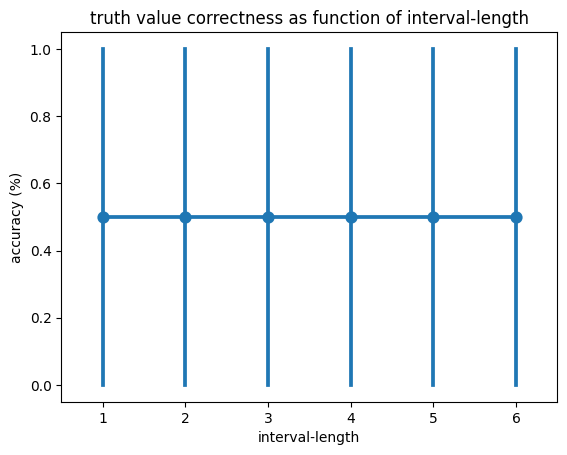

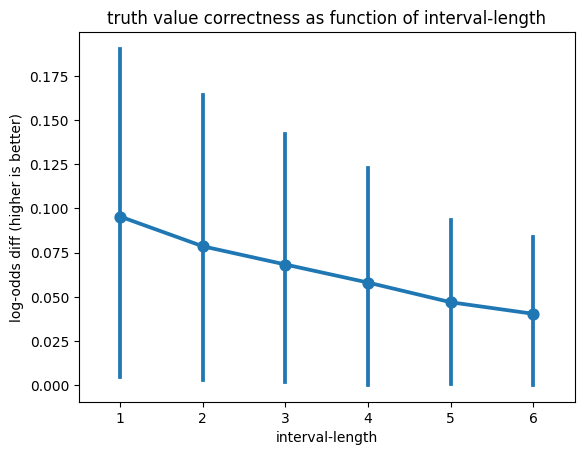

In [ ]:
truth_df_summ=collapse_truth_df(truth_df)
# cont_df
sns.pointplot(truth_df_summ,x='interval-length',y='correct-overall')
plt.title('truth value correctness as function of interval-length')
plt.ylabel('accuracy (%)')
plt.figure()
sns.pointplot(truth_df_summ,x='interval-length',y='score-diff')
plt.title('truth value correctness as function of interval-length')
plt.ylabel('log-odds diff (higher is better)')


Quite odd, it never works. Seems `value_2` is always incorrect. Let's test this assumption:

In [ ]:
value2_rows=truth_df['sentence-name'].str.contains('value_2')
print("value2 rows: ",truth_df[value2_rows]['correct'].mean())
print("value2 rows: ",truth_df[~value2_rows]['correct'].mean())

truth_df[truth_df['sentence-name'].str.contains('value_2')]

# okay, indeed, always incorrect. Seems like model simply ALWAYS says True rather than False? Is that correct?

value2 rows:  0.0
value2 rows:  1.0


,sentence-id,sentence-name,interval-length,probe-method,score-good,score-bad,score-diff,correct,correct-overall
1,retrieval,retrieval_interval_1_truth_value_2,1,truth_value,-2.600216,-2.596496,-0.003720,False,NaN
3,retrieval,retrieval_interval_2_truth_value_2,2,truth_value,-2.657091,-2.651440,-0.005652,False,NaN
5,retrieval,retrieval_interval_3_truth_value_2,3,truth_value,-2.719489,-2.709862,-0.009627,False,NaN
7,retrieval,retrieval_interval_4_truth_value_2,4,truth_value,-2.510342,-2.501099,-0.009243,False,NaN
9,retrieval,retrieval_interval_5_truth_value_2,5,truth_value,-2.353159,-2.346542,-0.006617,False,NaN
11,retrieval,retrieval_interval_6_truth_value_2,6,truth_value,-2.268854,-2.261909,-0.006944,False,NaN
25,containment,containment_interval_1_truth_value_2,1,truth_value,-2.273428,-2.268350,-0.005078,False,NaN
27,containment,containment_interval_2_truth_value_2,2,truth_value,-2.227686,-2.222367,-0.005319,False,NaN
29,containment,containment_interval_3_truth_value_2,3,truth_value,-2.395210,-2.388325,-0.006886,False,NaN
31,containment,containment_interval_4_truth_value_2,4,truth_value,-2.336160,-2.330249,-0.005911,False,NaN


### Let's now do continuation

In [ ]:
def group_continuation(df):
    """
    same but continuation
    """
    # Group by the specified columns and calculate mean for numeric columns
    # Here we ensure that 'correct' is treated as a float for the purpose of mean calculation
    grouped_df = df.groupby(['sentence-id', 'interval-length', 'probe-method']).agg({
        'score-diff': 'mean',
        'correct': lambda x: x.astype(float).mean()  # Calculate the mean of boolean values
    }).reset_index()

    # Rename 'correct' to 'accuracy'
    grouped_df.rename(columns={'correct': 'accuracy'}, inplace=True)

    return grouped_df



Text(0, 0.5, 'log-odds diff (higher is better)')

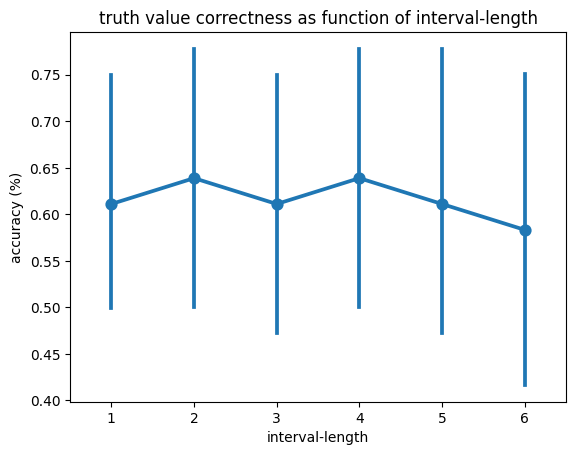

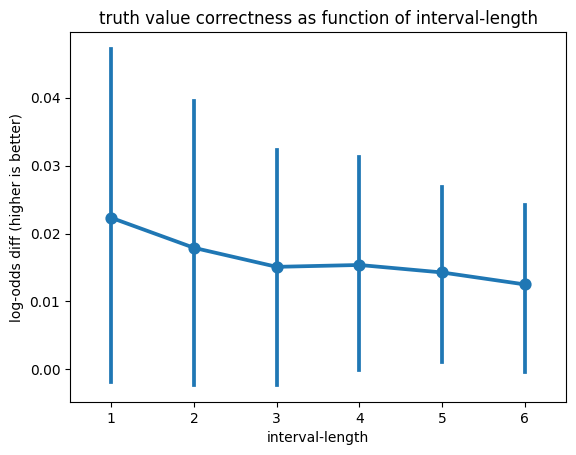

In [ ]:
cont_df_summ=group_continuation(cont_df)#cont_df.groupby(['sentence-id','interval-length','probe-method']).mean().reset_index()
cont_df_summ

sns.pointplot(cont_df_summ,x='interval-length',y='accuracy')
plt.title('truth value correctness as function of interval-length')
plt.ylabel('accuracy (%)')
plt.figure()
sns.pointplot(cont_df_summ,x='interval-length',y='score-diff')
plt.title('truth value correctness as function of interval-length')
plt.ylabel('log-odds diff (higher is better)')


<Axes: ylabel='score-diff'>

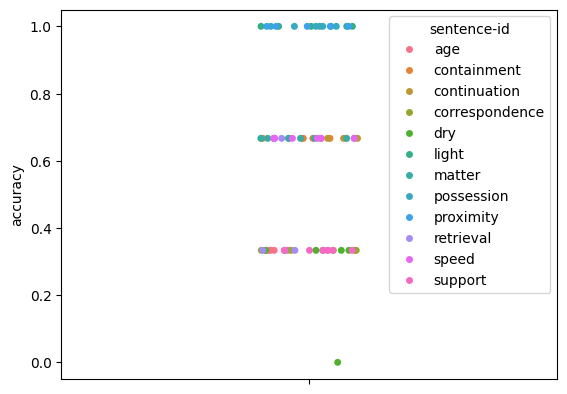

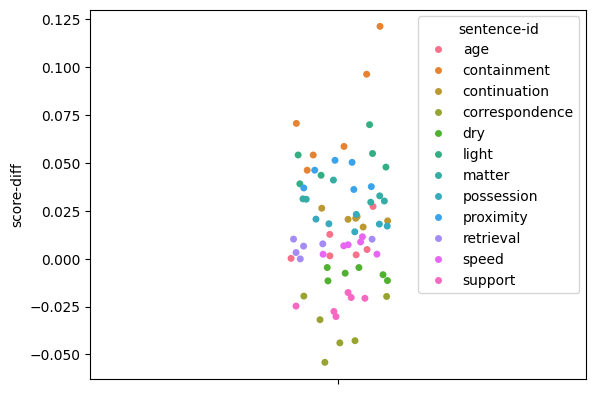

In [ ]:
sns.stripplot(cont_df_summ,y='accuracy',hue='sentence-id')
plt.figure()
sns.stripplot(cont_df_summ,y='score-diff',hue='sentence-id')


In [ ]:
#@title Generate the Qualtrics .txt file

print(convert_dicts_to_new_format(retrieval_dict, possession_dict, names_dict, going_dict, deception_dict, alone_dict, cutting_dict, above_dict, directions_dict, containment_dict, pulling_dict, light_dict))

# Save to .txt (for work in VS code)
data = convert_dicts_to_new_format(containment_dict, support_dict, dry_dict, light_dict, matter_dict, proximity_dict, continuation_dict, speed_dict, age_dict, correspondence_dict, possession_dict, retrieval_dict)

with open('qualtrics_import_1.txt', 'w') as file:
    file.write(data)

In [ ]:
## Full Visibility Qualtrics Code

def convert_dicts_to_new_format(*dicts):
    output_strings = []

    # Instructions block
    output_strings.append("[[Block:instructions]]")
    output_strings.append("Instructions. In this survey, you will be presented with a series of sentences. "
                          "Afterwards, you will be presented with questions that test your understanding "
                          "of those sentences. Please choose the answers that intuitively feel right; "
                          "there are no trick questions. Base your answers off the sentences that you read, "
                          "and not the other questions that you answered.\n")

    for d in dicts:
        # Create a new block for each interval length
        for index, interval in enumerate(d['interval']):
            block_name = f"{d['sentence_id']}interval{index}"
            output_strings.append(f"[[Block:{block_name}]]")

            # Context
            output_strings.append(f"{d['sentence_id']}context. {d['context'].strip()}\n")

            # Update
            output_strings.append(f"{d['sentence_id']}update. {d['update'].strip()}\n")

            # Interval
            output_strings.append(f"{d['sentence_id']}interval{index}. {interval}\n")

            # Truth value questions
            for i in range(1, 3):
                truth_query = d[f"truth_value_query_{i}"]
                output_strings.append(f"{d['sentence_id']}truthvaluequery{i}. True or False: {truth_query}\n\nTrue\nFalse\n")

            # Continuation prompts
            for i in range(1, 4):
                prompt = d[f"continuation_prompt_{i}"]
                coherent = d[f"continuation_coherent_keyword_{i}"] + " " + d[f"continuation_coherent_suffix_{i}"].strip()
                incoherent = d[f"continuation_incoherent_keyword_{i}"] + " " + d[f"continuation_incoherent_suffix_{i}"].strip()
                output_strings.append(f"{d['sentence_id']}continuationprompt{i}. Which of the following sentences feels most likely? \n\n{prompt} {coherent}\n{prompt} {incoherent}\n")

    return '\n'.join(output_strings)

# Example dictionaries
example_dict = {
    'context': 'You are in an unlit room. There are no windows in the room. You notice a chair in the corner of the room.',
    'update': 'You strike a match from your pocket, and hold it up in front of you.',
    'interval': [
        "",
        "The match feels warm near your face.",
        "The match feels warm near your face. There are more matches in the matchbox.",
        "The match feels warm near your face. There are more matches in the matchbox. The lit match produces smoke.",
        "The match feels warm near your face. There are more matches in the matchbox. The lit match produces smoke. It smells distinctive, yet pleasant.",
        "The match feels warm near your face. There are more matches in the matchbox. The lit match produces smoke. It smells distinctive, yet pleasant. You also feel the warmth of the match reaching your hand."
    ],
    "truth_value_query_1": "The match is lit.",
    "truth_value_answer_1": True,
    "truth_value_query_2": "The room is brightly lit.",
    "truth_value_answer_2": False,
    "continuation_prompt_1": "Next, you notice that",
    "continuation_coherent_keyword_1": "the match is burning brightly.",
    "continuation_coherent_suffix_1": "",
    "continuation_incoherent_keyword_1": "the match is not lit.",
    "continuation_incoherent_suffix_1": "",
    "continuation_prompt_2": "Then, you realize that",
    "continuation_coherent_keyword_2": "you have more matches in your pocket.",
    "continuation_coherent_suffix_2": "",
    "continuation_incoherent_keyword_2": "you have no more matches left.",
    "continuation_incoherent_suffix_2": "",
    "continuation_prompt_3": "You look around and see",
    "continuation_coherent_keyword_3": "that the room is dimly lit by the match.",
    "continuation_coherent_suffix_3": "",
    "continuation_incoherent_keyword_3": "nothing because it is pitch dark.",
    "continuation_incoherent_suffix_3": "",
    "tag_social": False,
    "tag_objectness": False,
    "tag_numerosity": True,
    "tag_geometry": False,
    "tag_temporal": False,
    "tag_complexity": 2,
    'sentence_id': 'light'
}

# Convert dictionaries to new format
formatted_text = convert_dicts_to_new_format(example_dict)
print(formatted_text)


# Convert dictionaries to new format
#formatted_text = convert_dicts_to_new_format(retrieval_dict, possession_dict, names_dict, going_dict, deception_dict, alone_dict, cutting_dict, above_dict, directions_dict, containment_dict, pulling_dict, light_dict)
#print(formatted_text)


[[Block:instructions]]
Instructions. In this survey, you will be presented with a series of sentences. Afterwards, you will be presented with questions that test your understanding of those sentences. Please choose the answers that intuitively feel right; there are no trick questions. Base your answers off the sentences that you read, and not the other questions that you answered.

[[Block:lightinterval0]]
lightcontext. You are in an unlit room. There are no windows in the room. You notice a chair in the corner of the room.

lightupdate. You strike a match from your pocket, and hold it up in front of you.

lightinterval0. 

lighttruthvaluequery1. True or False: The match is lit.

True
False

lighttruthvaluequery2. True or False: The room is brightly lit.

True
False

lightcontinuationprompt1. Which of the following sentences feels most likely? 

Next, you notice that the match is burning brightly. 
Next, you notice that the match is not lit. 

lightcontinuationprompt2. Which of the fol